# Step 1 - Getting the data

In [ ]:
import pandas
import Data_Cleaning as dc
import Glass_Door_Scraper_var0 as Sahar

# GLOBAL
NUM_JOBS = 100
PATH_DRIVER = "C:\Program Files (x86)/chromedriver"
MAX_SLEEP_TIME = .7


def main_scraper():


    """
    הבחנו שהאתר Glassdoor מביא אך ורק תוצאות רלוונטיות ביותר, ולכן אף-על-פי שיש לאתר להביא עשרות אלפי משרות מכל מילת מפתח, הוא ימשיך ויתן את אותן ה-900 משרות מכיוון שהוא מוצא אותן הכי רלוונטיות.
    על מנת להתגבר על כך, חילקנו את מילות המפתח שלנו לחיםפושים יותר ויותר ספציפיים וממוקדים ובכך למעשה השגנו את כל האפשרויות שיש לאתר לתת.

    """
    # Software Engineer
    list_keywords_SE = [
        'Artificial Intelligence', 'Machine Learning engineer',
        'Data engineering'
        'DevOps', 'Cybersecurity', 'Data science and analytics', 'Augmented Reality', 'Robotics', 'Web development',
        'Internet of Things', 'Financial technology', 'HealthTech', 'E-commerce',
        'Enterprise software', 'Education technology', 'Social media and networking engineer']

    # Data Science
    list_keywords_DS = [
        'Data tScientist', 'Data Analyst', 'Machine Learning Engineer',
        'Data Engineer', 'Business Intelligence Analyst', 'Data Architect',
        'Statistician', 'Quantitative Analyst', 'Data Product Manager',
        'Research Scienist'
    ]

    # QA
    list_keywords_QA = [
        'Quality Assurance Analyst', 'Software Tester', 'QA Engineer', 'Automation Tester',
        'Test Lead', 'Test Manager', 'Performance Tester', 'Security Tester', 'User Acceptance Tester',
        'Test Automation Engineer', 'Mobile Tester', 'Game Tester', 'Test Architect',
        'Regression Tester', 'Load Tester', 'Accessibility Tester', 'Functional Tester',
        'Usability Tester', 'Localization Tester', 'Database Tester', 'API Tester',
        'Penetration Tester', 'Compliance Tester', 'Test Coordinator', 'Test Consultant',
        'Test Strategist', 'Test Trainer', 'Test Process Engineer', 'Test Data Analyst', 'Test Environment Manager']

    # Machin learning
    list_keywords_ML = ['Machine Learning Engineer', 'AI Researcher', 'Computer Vision Engineer',
                        'Natural Language Processing (NLP) Engineer',
                        'Deep Learning Engineer', 'Robotics Engineer', 'Recommender Systems Engineer',
                        'Data Analyst', 'Business Intelligence Analyst', 'Fraud Detection Analyst',
                        'Image Recognition Engineer', 'Speech Recognition Engineer', 'Predictive Analytics Specialist',
                        'Autonomous Vehicle Engineer', 'Healthcare Data Scientist', 'Financial Analyst (ML)',
                        'Social Media Analyst', 'Sentiment Analysis Specialist', 'Text Mining Expert',
                        'Data Mining Engineer', 'Pattern Recognition Engineer', 'Anomaly Detection Specialist',
                        'Virtual Assistant Developer', 'Chatbot Developer', 'AI Consultant',
                        'Predictive Maintenance Engineer', 'Energy Analyst (ML)',
                        'Manufacturing Optimization Specialist', 'Agriculture Analytics Specialist']

    # Game Development
    list_keywords_GD = ['Game Designer', 'Game Programmer', 'Game Artist', 'Game Animator', 'Game Sound Designer',
                        'Game Tester', 'Game Producer', 'Game Writer', 'Game Level Designer', 'Game UI/UX Designer',
                        'Game Monetization Specialist', 'Game Quality Assurance Tester', 'Game Engine Developer',
                        'Game Localization Specialist', 'Gameplay Programmer', 'Gameplay Designer',
                        # VR & AR
                        'VR Developer', 'AR Developer', 'VR/AR Designer', 'VR/AR Artist', 'VR/AR Engineer',
                        'VR/AR Content Creator', 'VR/AR UX Designer', 'VR/AR Software Engineer'


                        # Computer Graphics
                                                                      'Graphics Programmer',
                        'Graphics Software Engineer', 'Shader Developer', 'Rendering Engineer',
                        'Computer Vision Engineer', '3D Modeler', 'Texture Artist', 'Lighting Artist',
                        'Character Artist',
                        'Environment Artist', 'Rigging Artist'

                        # Simulation and Training
                                              'Simulation Developer', 'Training Developer', 'Simulation Engineer',
                        'Training Specialist',
                        'Simulation Programmer', 'Training Coordinator', 'Simulation Designer', 'Training Instructor'


                        # Serious Games
                                                                                                'Serious Games Developer',
                        'Educational Game Developer', 'Healthcare Game Developer',
                        'Military Training Game Developer', 'Corporate Training Game Developer',
                        'Government Simulation Developer'

                        # Interactive Media
                        'Interactive Media Developer', 'Interactive Media Designer', 'Interactive Media Artist',
                        'Interactive Media Programmer', 'Interactive Storyteller', 'Interactive Experience Designer'

                        # Game Analytics
                                                                                   'Game Data Analyst',
                        'Game Data Scientist', 'Game Analytics Specialist', 'Game User Researcher',
                        'Game Market Research Analyst', 'Game Business Intelligence Analyst']

    # calling the scraper with different category
    scrape_jobs_and_save(list_keywords_ML, "machine learning", "ML")
    scrape_jobs_and_save(list_keywords_SE, "software engineer", "SE")
    scrape_jobs_and_save(list_keywords_QA, "QA", "QA")
    scrape_jobs_and_save(list_keywords_GD, "game development", "GD")
    scrape_jobs_and_save(list_keywords_DS, "data scientist", "DS")


def scrape_jobs_and_save(list_keywords, category, file_prefix):
    for i, keyword in enumerate(list_keywords):
        try:
            df = Sahar.get_jobs(keyword, NUM_JOBS, PATH_DRIVER, MAX_SLEEP_TIME)  # call to scraper
            df_clean = dc.data_cleaning(df)  # first clean: calculate the salary, fixing the location and more
            df_clean.to_csv(f"data files/{category}/{file_prefix}_{i}_{keyword}.csv", index=False)
        except Exception as e:
            print("!!!!!!!!!!!!main exception!!!!!!!!!", e)


def unique_values():
    df1 = pandas.read_csv('data files/software engineer/0_Cloud computing.csv')
    df2 = pandas.read_csv('data files/software engineer/1_Mobile app development.csv')
    df3 = pandas.read_csv('data files/software engineer/0_Web development.csv')
    df4 = pandas.read_csv('data files/software engineer/2_Desktop software development.csv')
    df5 = pandas.read_csv('data files/software engineer/3_Game development.csv')

    dc.column_unique_values(df1, df2, df3, df4, df5, 'Sector', 'software engineer')


main_scraper()


### Scraper code

In [ ]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, TimeoutException
import time
import pandas as pd
from datetime import datetime
from selenium import webdriver
from selenium.webdriver import ActionChains

import Extract_from_text as ets
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import WebDriverException





def get_jobs(keyword, num_jobs, path, slp_time):

    counter_break = 0

    print(f"Entering get_jobs with keyword {keyword}, number of jobs={num_jobs}")

    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")

    driver = webdriver.Chrome(executable_path=path, options=options)
    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword=" \
          + keyword + "&sc.keyword=" \
          + keyword + "&locT=&locId=&jobType="
    driver.get(url)
    jobs = []

    wait = WebDriverWait(driver, slp_time)  # Wait for a maximum of 3 seconds


    try:
        driver.find_element_by_class_name("selected").click()
        print('#  Process Start Successfully  #')
    except ElementClickInterceptedException:
        pass


    try:
        job_buttons = driver.find_elements_by_css_selector("a.jobLink") #[-1]  # holding 30 'a' tags
        job_buttons[0].click()  # CRUSTAL!!!
        print(job_buttons[0])
        print("Clicked on job button successfully!")
    except Exception as e:
        print(e)


    try:
        close_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '[alt="Close"]')))
        close_button.click()  # Clicking the X button
        print('Close button clicked#2\n')  # AGAIN!!
    except TimeoutException:
        print('Close button DID NOT clicked!#2')
        pass


    try:
        total_jobs_locator = (By.XPATH, '//*[@id="MainCol"]/div[1]/div[1]/div/div/h1')
        num_of_total_jobs = wait.until(EC.visibility_of_element_located(total_jobs_locator)).text.replace(f" {keyword.lower()} Jobs", "")
        JOBS = int(num_of_total_jobs)
        if JOBS < num_jobs:
            num_jobs = JOBS
        print(f'Num of total jobs: {num_of_total_jobs}')
    except WebDriverException as e:
        print(e, "e1")
        return "Break"





    num_of_job_in_page = 0  # In every page there has 30 jobs
    currentPage = 0
    # currentPage = 0
    j = int(1)  # for creating a files


    try:
        print(currentPage)
        next_page_locator = (By.CSS_SELECTOR, '[alt="next-icon"]')
        next_page_element = wait.until(EC.element_to_be_clickable(next_page_locator))
        next_page_element.click()
        # print("Next page!")
    except NoSuchElementException:
        df = pd.DataFrame(jobs)
        return df
    except Exception as e:
        pass
        # print("An exception occurred while clicking the next page button:", str(e))

    page_counter = 0
    while num_jobs > len(jobs):
        print("Entering page number:", currentPage + 1)
        page_counter += 1
        if page_counter == 34:
            df = pd.DataFrame(jobs)
            return df

        # Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException as e:
            # print(e, "e2")
            pass

        time.sleep(3)
        list_elements = WebDriverWait(driver, 3).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'ul.hover li.react-job-listing')))
        # print(list_elements)


        for i, element in enumerate(list_elements):

            # Check if the number of jobs that collected is below the number we want or below the number of the total jobs
            if len(jobs) >= num_jobs:
                print(f"Progress stop because the number of jobs in the website is over :)"
                      f"\nNumber of jobs in the website:{num_of_total_jobs} Number of jobs scraped:{len(jobs)}")
                break

            if num_of_job_in_page == 30:  # here we will stop and move to the next page
                break

            try:
                div_element = element.find_element(By.TAG_NAME, 'div')
                job_button = div_element.find_element(By.TAG_NAME, 'a')
                job_button.click()
                # print("##job click##")
            except Exception as e:
                pass
                # print(e, 'e2.1')


            if i % 1 == 0:  # because each post has 3 links
                now = datetime.now()  # for testing
                is_remote = False
                num_of_job_in_page += 1  # 1/30

                print(f"\nProgress: {len(jobs) + 1}/{num_jobs} in page number: {currentPage + 1}")


                try:
                    job_button.click()  # Click on the next post in the list
                    # print("--job click--")
                except Exception as e:
                    counter_break += 1
                    # print(f"counter_break = {counter_break}\n"
                    #       f"ERROR = {e}"
                    #       f"ERROR number = e3")
                    if counter_break == 50:
                        print(f"Process stop before reaching the target of jobs {len(jobs)}/{num_jobs}")
                        df = pd.DataFrame(jobs)
                        return df
                    else:
                        pass



                try:
                    show_more_button_locator = (By.XPATH, '//*[@id="JobDescriptionContainer"]/div[2]')
                    show_more_button = wait.until(EC.element_to_be_clickable(show_more_button_locator))
                    show_more_button.click()

                    try:
                        job_description_locator = (By.XPATH, '//*[@id="JobDescriptionContainer"]')
                        job_description = wait.until(EC.visibility_of_element_located(job_description_locator))
                        text = job_description.text

                        years_of_experience = ets.nlp_for_years_of_experience(text)
                        education = ets.extract_education(text)
                        position = ets.extract_position_level(text)

                        doc = False
                        if doc:
                            with open(f"raw text/row_text_{keyword}{j}.txt",
                                      'w') as f:  # for testing the 'extract' functions
                                j += 1
                                f.write(text)
                                f.write(
                                    f"\n\n\nTesting regine:"
                                    f"\nExperience: {years_of_experience}"
                                    f"\nEducation: {education}"
                                    # f"\nPosition Level: {position_level}"
                                    f"\n Time of Scrape: {now}")

                    except Exception as e:
                        years_of_experience = -1
                        education = -1
                        position = -1
                        # print(f"e4 , Attempting to scrape the text did not worked  {str(e)} ")


                except Exception as e:
                    years_of_experience = -1
                    education = -1
                    position = -1
                    # print(f"e5!{str(e)}")



                try:
                    company_name_locator = (By.XPATH, '//div[@class="css-87uc0g e1tk4kwz1"]')
                    company_name_element = wait.until(EC.visibility_of_element_located(company_name_locator))
                    company_name = company_name_element.text

                except:
                    # print("Failed to collect company name!")
                    company_name = int(-1)


                try:
                    job_title_locator = (By.CSS_SELECTOR, "div[data-test='jobTitle']")
                    job_title_element = wait.until(EC.visibility_of_element_located(job_title_locator))
                    job_title = job_title_element.text
                except:
                    # print("Failed to collect job title!")
                    job_title = int(-1)


                try:
                    location_locator = (By.CSS_SELECTOR, "div[data-test='location']")
                    location_element = wait.until(EC.visibility_of_element_located(location_locator))
                    location = location_element.text
                    if "Remote" in location:
                        is_remote = True
                except:
                    # print("Failed to collect location!")
                    location = int(-1)


                try:
                    job_rating_locator = (By.CSS_SELECTOR, "span[data-test='detailRating']")
                    job_rating_element = wait.until(EC.visibility_of_element_located(job_rating_locator))
                    job_rating = job_rating_element.text
                except:
                    # print("Failed to collect job Rating!")
                    job_rating = int(-1)

                try:
                    rating_elements_locator = (By.CSS_SELECTOR, "span.css-a7hxlj.erz4gkm1")
                    rating_elements = wait.until(EC.presence_of_all_elements_located(rating_elements_locator))

                    career_opportunities = rating_elements[1].text
                    comp_and_benefits = rating_elements[3].text
                    culture_and_values = rating_elements[5].text
                    senior_management = rating_elements[7].text
                    work_life_balance = rating_elements[9].text

                except Exception as e:
                    career_opportunities = comp_and_benefits = culture_and_values = senior_management = work_life_balance = int(-1)
                    # print(e, "e6")


                try:
                    salaries_locator = (By.XPATH, '//div[@class="css-1bluz6i e2u4hf13"]')
                    salaries_element = wait.until(EC.visibility_of_element_located(salaries_locator))
                    salaries = salaries_element.text
                except TimeoutException:
                    # print("Failed to collect Salary Estimate!")
                    salaries = int(-1)
                    pass

                try:
                    company_overview_button_locator = (By.CSS_SELECTOR, 'h2.css-1r0ltbv.e9b8rvy0')
                    company_overview_button = wait.until(EC.element_to_be_clickable(company_overview_button_locator))
                    company_overview_button.click()

                    try:
                        size_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Size"]/following-sibling::span')
                        size_element = wait.until(EC.visibility_of_element_located(size_locator))
                        size = size_element.text
                    except NoSuchElementException:
                        size = -1
                        # print("Failed to collect company size!")

                    try:
                        founded_locator = (By.XPATH, '//span[text()="Founded"]/following-sibling::span')
                        founded_element = wait.until(EC.visibility_of_element_located(founded_locator))
                        founded = founded_element.text
                    except NoSuchElementException:
                        founded = int(-1)
                        # print("Failed to collect founded date!")

                    try:
                        type_of_ownership_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Type"]/following-sibling::span')
                        type_of_ownership_element = wait.until(EC.visibility_of_element_located(type_of_ownership_locator))
                        type_of_ownership = type_of_ownership_element.text
                    except NoSuchElementException:
                        type_of_ownership = int(-1)
                        # print("Failed to collect type of ownership!")

                    try:
                        industry_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Industry"]/following-sibling::span')
                        industry_element = wait.until(EC.visibility_of_element_located(industry_locator))
                        industry = industry_element.text
                    except NoSuchElementException:
                        industry = int(-1)
                        # print("Failed to collect industry!")

                    try:
                        sector_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Sector"]/following-sibling::span')
                        sector_element = wait.until(EC.visibility_of_element_located(sector_locator))
                        sector = sector_element.text
                    except NoSuchElementException:
                        sector = int(-1)
                        # print("Failed to collect sector!")

                    try:
                        revenue_locator = (By.XPATH, '//div[@class="d-flex justify-content-start css-rmzuhb e1pvx6aw0"]//span[text()="Revenue"]/following-sibling::span')
                        revenue_element = wait.until(EC.visibility_of_element_located(revenue_locator))
                        revenue = revenue_element.text
                    except NoSuchElementException:
                        revenue = int(-1)
                        # print("Failed to collect revenue!")

                except:
                    size = int(-1)
                    founded = int(-1)
                    type_of_ownership = int(-1)
                    industry = int(-1)
                    sector = int(-1)
                    revenue = int(-1)
                    # print("Failed to click the Company Overview button!")

                jobs.append({"Job Title": job_title,
                             "Experience": years_of_experience,
                             "Education": education,
                             "Position": position,
                             "Company Name": company_name,
                             "Salary Estimate": salaries,
                             "Location": location,
                             "Rating": job_rating,
                             "Is Remote": is_remote,
                             "Company Size": size,
                             "Founded": founded,
                             "Type of Ownership": type_of_ownership,
                             "Industry": industry,
                             "Sector": sector,
                             "Revenue": revenue,
                             "Career Opportunities": career_opportunities,
                             "Comp & Benefits": comp_and_benefits,
                             "Culture & Values": culture_and_values,
                             "Senior Management": senior_management,
                             "Work Life Balance": work_life_balance,
                             "Time of Scrape": now})

        # END FOR LOOP

        # move to the next page
        try:


            # Save the current page URL
            current_url = driver.current_url

            next_page_locator = (By.CSS_SELECTOR, '[alt="next-icon"]')
            next_page_element = wait.until(EC.element_to_be_clickable(next_page_locator))
            next_page_element.click()
            time.sleep(3)

            # Check the new page URL
            new_url = driver.current_url
            if new_url != current_url:
                pass
                # print("Next page!")
            else:
                pass
                # print("Failed to move to the next page")

            # print(curr_page)
            currentPage += 1
            num_of_job_in_page = 0
            time.sleep(1)
        except NoSuchElementException:
            df = pd.DataFrame(jobs)
            return df
        except Exception as e:
            pass
            # print("An exception occurred while clicking the next page button:", str(e))





    df = pd.DataFrame(jobs)
    return df

# Step 2 - Removing duplicates

In [ ]:
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler


def hourly_to_annual(salary):
    return round(float(salary * 2080), 2)  # assuming 40 hours/week and 52 weeks/year


def monthly_to_annual(salary):
    return round(float(salary * 12), 2)


def data_cleaning(df1):
    df = df1.copy()
    df = df[df['Salary Estimate'] != -1].copy()

    # Remove (est.)
    try:
        df["Time Unit"] = df["Salary Estimate"].apply(lambda x: x.split(' ')[1])
    except Exception as e:
        pass
        # print(e, "e1")

    # Add more columns to calculate the salary
    try:
        df["Time Unit"] = df["Time Unit"].apply(lambda x: x.split('/')[1])
    except Exception as e:
        pass
        # print(e, "e2")

    # Split the "Salary Estimate" column by the '/' separator and extract the first element
    try:
        df["Annual Salary"] = df["Salary Estimate"].apply(lambda x: (x.split('/')[0]))
    except Exception as e:
        pass
        # print(e, "e3")

    # Remove the dollar sign ($) from the "Salary Estimate" column
    try:
        df["Annual Salary"] = df["Annual Salary"].apply(lambda x: x.split('$')[1])
    except Exception as e:
        pass
        # print(e, "e4")

    # Remove any commas from the "Salary Estimate" column
    try:
        df["Annual Salary"] = df["Annual Salary"].apply(lambda x: x.replace(',', ''))
    except Exception as e:
        pass
        # print(e, "e5")

    # Convert the "Salary Estimate" column to a float data type
    try:
        df["Annual Salary"] = df["Annual Salary"].apply(lambda x: float(x))
    except Exception as e:
        pass
        # print(e, "e6")

    # Convert hourly salaries to annual salaries
    try:
        df.loc[df['Time Unit'] == 'hr', 'Annual Salary'] = df.loc[df['Time Unit'] == 'hr', 'Annual Salary'].apply(
            hourly_to_annual)
    except Exception as e:
        pass
        # print(e, "e7")

    # Convert monthly salaries to annual salaries
    try:
        df.loc[df['Time Unit'] == 'mo', 'Annual Salary'] = df.loc[df['Time Unit'] == 'mo', 'Annual Salary'].apply(
            monthly_to_annual)
    except Exception as e:
        pass
        # print(e, "e8")

    try:
        df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
    except Exception as e:
        pass
        # print(e, "e9")

    # Convert the 'Founded' to 'Company Old'
    try:
        df['Founded'] = df['Founded'].apply(lambda x: -1 if x == -1 else int(x))
        df['Company Old'] = df['Founded'].apply(lambda x: x if x == -1 else 2023 - x)
        df.insert(9, 'Company Old', df.pop('Company Old'))  # insert it into a specific index
    except Exception as e:
        pass
        # print(e, "e10")

    # Convert 'Is Remote' to 0/1
    try:
        df['Is Remote'] = df['Is Remote'].astype(int)
    except Exception as e:
        pass
        # print(e, "e11")

    desired_columns = ['Salary Estimate', 'Annual Salary']
    df = df.reindex(columns=desired_columns + [col for col in df.columns if col not in desired_columns])

    # make location only two characters or Remote
    try:
        # print(df.dtypes)
        df['Location'] = df['Location'].fillna('')
        df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
    except Exception as e:
        print(e, 'e location')

    df = pd.DataFrame(df)
    fill_experience(df)
    return df


def preprocess_scaling(df):  # Not fit for the ML model!!!

    # Preprocess the 'Company Size' column
    company_size_mapping = {
        "Unknown / Non-Applicable": None,
        "-1": None,
        "1 to 50 Employees": int(1),
        "51 to 200 Employees": int(2),
        "201 to 500 Employees": int(3),
        "501 to 1000 Employees": int(4),
        "1001 to 5000 Employees": int(5),
        "5001 to 10000 Employees": int(6),
        "10000+ Employees": int(7)
    }
    df["Scale_Company_Size"] = df["Company Size"].map(company_size_mapping)

    # Preprocess the 'Revenue' column
    revenue_mapping = {
        "Unknown / Non-Applicable / -1": None,
        "Less than $1 million (USD)": 1,
        "$1 to $5 million (USD)": 2,
        "$5 to $25 million (USD)": 3,
        "$25 to $50 million (USD)": 4,
        "$50 to $100 million (USD)": 5,
        "$100 to $500 million (USD)": 6,
        "$500 million to $1 billion (USD)": 7,
        "$1 to $2 billion (USD)": 7,
        "$1 to $5 billion (USD)": 7,
        "$2 to $5 billion (USD)": 8,
        "$5 to $10 billion (USD)": 8,
        "$10+ billion (USD)": 9
    }
    df["Scale_Revenue"] = df["Revenue"].map(revenue_mapping)



    return df


def column_unique_values(df1, df2, df3, df4, df5, column_name, keyword):
    concatenated_column = pd.concat(
        [df1[column_name], df2[column_name], df3[column_name], df4[column_name], df5[column_name]])

    unique_values = concatenated_column.unique()
    str_unique = ''
    for i, unique in enumerate(unique_values):
        str_unique += unique
        if i % 5 == 0:
            str_unique += '\n'
        else:
            str_unique += ','

    with open(f"unique_values_'{column_name}'_in_'{keyword}'.txt", 'w') as f:
        f.write(str_unique)
        f.write(f"\n\nThe number of unique values is {len(unique_values)}")


def one_hot_encoding(df, column_names):
    df = pd.get_dummies(df, columns=column_names)
    return df


def final_clean(df):  # call this function after one-hot encoding!
    columns = list(df)

    if 'Salary Estimate' in columns:
        df.drop('Salary Estimate', axis=1, inplace=True)
    if 'Company Name' in columns:
        df.drop('Company Name', axis=1, inplace=True)
    if '<null>' in columns:
        df.drop('<null>', axis=1, inplace=True)
    if 'null' in columns:
        df.drop('null', axis=1, inplace=True)
    if 'Company Size' in columns:
        df.drop('Company Size', axis=1, inplace=True)
    if 'Revenue' in columns:
        df.drop('Revenue', axis=1, inplace=True)
    if 'Time Unit' in columns:
        df.drop('Time Unit', axis=1, inplace=True)
    if 'Industry' in columns:
        df.drop('Industry', axis=1, inplace=True)
    if 'Sector' in columns:
        df.drop('Sector', axis=1, inplace=True)
    if 'Type of Ownership' in columns:
        df.drop('Type of Ownership', axis=1, inplace=True)
    if 'Time of Scrape' in columns:
        df.drop('Time of Scrape', axis=1, inplace=True)
    if 'Location' in columns:
        df.drop('Location', axis=1, inplace=True)
    if 'Unnamed: 0' in columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    if 'Unnamed: 0.1' in columns:
        df.drop('Unnamed: 0.1', axis=1, inplace=True)
    if 'Founded' in columns:
        df.drop('Founded', axis=1, inplace=True)
    if 'Job Title' in columns:
        df.drop('Job Title', axis=1, inplace=True)
    if 'anonymous' in columns:
        df.drop('anonymous', axis=1, inplace=True)
    # df = df.loc[:, ~df.columns.str.contains('^anonymous')]

    print(f"The number of Duplicated = {df.duplicated().sum()}")
    df.drop_duplicates(keep='first', inplace=True)
    print(f"The final files = {df.shape} ")

    df = pd.DataFrame(df)
    return df


def merge_csv_files_in_folder(folder_path):
    df_list = []  # List to hold DataFrames

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):  # Check a file extension
            df = pd.read_csv(os.path.join(folder_path, filename))
            df_list.append(df)

    # Concatenate all dataframes in the list
    merged_df = pd.concat(df_list, ignore_index=True)
    if 'Unnamed: 0' in list(merged_df):
        merged_df.drop('Unnamed: 0', axis=1, inplace=True)
    if 'Time of Scrape' in list(merged_df):
        merged_df.drop('Time of Scrape', axis=1, inplace=True)
    if 'Origin' in list(merged_df):
        merged_df.drop('Origin', axis=1, inplace=True)


    print(f"Before dropping duplicates: {merged_df.shape}")
    merged_df.drop_duplicates(keep='first', inplace=True)
    print(f"After dropping all duplicates: {merged_df.shape}")

    return merged_df


"""
New way of dilling with data cleaning and preparation - OOP !
"""


class DataInfo:
    def __init__(self, data):
        if type(data) == str:
            self.df = pd.read_csv(data, index_col=0)
        else:
            self.df = pd.DataFrame(data)

        if 'Time of Scrape' in list(self.df):
            self.df.drop('Time of Scrape', axis=1, inplace=True)
        if 'Origin' in list(self.df):
            self.df.drop('Origin', axis=1, inplace=True)
        if 'Unnamed: 0' in list(self.df):
            self.df.drop('Unnamed: 0', axis=1, inplace=True)

        print(f"Sum of duplicated: {self.df.duplicated().sum()}")
        self.df.drop_duplicates(keep='first', inplace=True)
        print(f"Shape after remove duplication: {self.df.shape}")

    def scaling(self):
        # Preprocess the 'Revenue' column
        revenue_mapping = {
            "Unknown / Non-Applicable / -1": None,
            "Less than $1 million (USD)": 1,
            "$1 to $5 million (USD)": 2,
            "$5 to $25 million (USD)": 3,
            "$25 to $50 million (USD)": 4,
            "$50 to $100 million (USD)": 5,
            "$100 to $500 million (USD)": 6,
            "$500 million to $1 billion (USD)": 7,
            "$1 to $2 billion (USD)": 7,
            "$1 to $5 billion (USD)": 7,
            "$2 to $5 billion (USD)": 8,
            "$5 to $10 billion (USD)": 8,
            "$10+ billion (USD)": 9
        }
        # Preprocess the 'Company Size' column
        company_size_mapping = {
            "Unknown / Non-Applicable": None,
            "-1": None,
            "1 to 50 Employees": int(1),
            "51 to 200 Employees": int(2),
            "201 to 500 Employees": int(3),
            "501 to 1000 Employees": int(4),
            "1001 to 5000 Employees": int(5),
            "5001 to 10000 Employees": int(6),
            "10000+ Employees": int(7)
        }

        self.df["Scale_Company_Size"] = self.df["Company Size"].map(company_size_mapping)
        self.df["Scale_Revenue"] = self.df["Revenue"].map(revenue_mapping)

    def to_csv(self, path):
        self.df.to_csv(path, index=False)


    def fill_all_missing_values_with_mean(self):
        # List of columns with missing values
        columns_with_missing = ['Experience', 'Education', 'Rating',
                                'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
                                'Senior Management', 'Work Life Balance', 'Scale_Revenue', 'Scale_Company_Size']
        # Iterate through each column
        for column_with_missing in columns_with_missing:
            if column_with_missing in list(self.df):

                # Replace -1 with NaN
                self.df[column_with_missing] = self.df[column_with_missing].replace(-1, np.nan)

                # Handle Education column separately
                if column_with_missing == 'Education':
                    self.df[column_with_missing].fillna(0, inplace=True)
                elif column_with_missing == 'Education':
                    self.df[column_with_missing].fillna('LA', inplace=True)

                else:
                    # Create a reference column without missing values
                    self.df['Reference'] = self.df[column_with_missing].copy()

                    # Calculate the mean value of the reference column
                    mean_value = self.df['Reference'].mean()

                    # Fill missing values with the mean value
                    self.df[column_with_missing].fillna(mean_value, inplace=True)

                    # Remove the reference column
                    self.df.drop('Reference', axis=1, inplace=True)


    def final(self):
        columns = list(self.df)
        df = self.df
        if 'Salary Estimate' in columns:
            df.drop('Salary Estimate', axis=1, inplace=True)
        if 'Company Name' in columns:
            df.drop('Company Name', axis=1, inplace=True)
        if '<null>' in columns:
            df.drop('<null>', axis=1, inplace=True)
        if 'null' in columns:
            df.drop('null', axis=1, inplace=True)
        if 'Company Size' in columns:
            df.drop('Company Size', axis=1, inplace=True)
        if 'Revenue' in columns:
            df.drop('Revenue', axis=1, inplace=True)
        if 'Time Unit' in columns:
            df.drop('Time Unit', axis=1, inplace=True)
        if 'Industry' in columns:
            df.drop('Industry', axis=1, inplace=True)
        if 'Sector' in columns:
            df.drop('Sector', axis=1, inplace=True)
        if 'Type of Ownership' in columns:
            df.drop('Type of Ownership', axis=1, inplace=True)
        if 'Time of Scrape' in columns:
            df.drop('Time of Scrape', axis=1, inplace=True)
        if 'Location' in columns:
            df.drop('Location', axis=1, inplace=True)
        if 'Unnamed: 0' in columns:
            df.drop('Unnamed: 0', axis=1, inplace=True)
        if 'Unnamed: 0.1' in columns:
            df.drop('Unnamed: 0.1', axis=1, inplace=True)
        if 'Founded' in columns:
            df.drop('Founded', axis=1, inplace=True)
        if 'Job Title' in columns:
            df.drop('Job Title', axis=1, inplace=True)
        if 'anonymous' in columns:
            df.drop('anonymous', axis=1, inplace=True)
        self.df = df.copy()




def filling_missing_values(job):
    columns_with_missing = ['Experience', 'Rating', 'Company Old',
                            'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
                            'Senior Management', 'Work Life Balance', 'Scale_Revenue', "Scale_Company_Size", 'Type of Ownership']

    list_types_of_ownership = ['Private', 'Public', 'Government', 'College / University', 'Hospital', 'Nonprofit Organization',
                               'Subsidiary or Business Segment', 'Unknown'
                                                                 'School', 'Self-employed', 'Contract']


    # Iterate through each column
    for column_with_missing in columns_with_missing:


        # Replace -1 with NaN
        job[column_with_missing] = job[column_with_missing].replace(-1, np.nan)
        job[column_with_missing] = job[column_with_missing].replace('-1', np.nan)


        # Margin all options of 'Type of ownership'
        if 'Type of Ownership' in list(job):
            if column_with_missing == 'Type of Ownership':
                job[column_with_missing] = job[column_with_missing].apply(lambda x: 'Private' if x == 'Company - Private' or x == 'Unknown' or x == 'Private Practice / Firm' else x)
                job[column_with_missing] = job[column_with_missing].apply(lambda x: 'Public' if x == 'Company - Public' else x)


        if column_with_missing == 'Type of Ownership':
            job[column_with_missing].fillna('Private', inplace=True)
        else:
            # Create a reference column without missing values
            job['Reference'] = job[column_with_missing].copy()

            # Calculate the mean value of the reference column
            mean_value = job['Reference'].mean()

            # Fill missing values with the mean value
            job[column_with_missing].fillna(mean_value, inplace=True)

            # Remove the reference column
            job.drop('Reference', axis=1,inplace=True)



def fill_experience(df):
    # Define the baseline salary-to-experience ratio (assumption: $5000 per year of experience)
    baseline_ratio_for_beginners = 33000
    baseline_ratio_for_exp = 25000

    # Copy dataframe to avoid altering the original one
    df_new = df.copy()
    df_new.reset_index(drop=True, inplace=True)
    #
    # for i in df_new.index:
    #     if df_new.loc[i, 'Experience'] in [0, 11] and (df_new.loc[i, 'Annual Salary'] > 45000 or df_new.loc[i, 'Annual Salary'] < 190000):
    #         df_new.loc[i, 'Experience'] = df_new.loc[i, 'Annual Salary'] / baseline_ratio

    for i in df_new.index:
        if df_new.loc[i, 'Experience'] == 0:
            if df_new.loc[i, 'Annual Salary'] > 45000:
                df_new.loc[i, 'Experience'] = round(df_new.loc[i, 'Annual Salary'] / baseline_ratio_for_beginners)

        if df_new.loc[i, 'Experience'] == 11:
            if df_new.loc[i, 'Annual Salary'] < 190000:
                if df_new.loc[i, 'Annual Salary'] / baseline_ratio_for_exp < 12:
                    df_new.loc[i, 'Experience'] = round(df_new.loc[i, 'Annual Salary'] / baseline_ratio_for_exp)
                else:  # Bigger then 12...
                    df_new.loc[i, 'Experience'] = 12

        df_new.loc[i, 'Experience'] = round(df_new.loc[i,'Experience'])
    return df_new
""""""""




# Step 3 - Feature engineering

In [ ]:
import re
import spacy


def extract_years_of_experience(job_description):
    pattern = r"\b(at least )?(?!.*years\s+old.*)([0-9]+\+?|(one|two|three|four|five|six|seven|eight|nine|ten))\s+(year|years|years'|ye|ya|Y)\s?(?!old)(\s+of\s+)?\b"

    # Search for the pattern in the job description
    match = re.search(pattern, job_description, re.IGNORECASE)

    if match:
        # Extract the number of years from the match object
        years_of_experience_str = match.group(2).split('+')[0]
        if years_of_experience_str.isdigit():
            years_of_experience = int(years_of_experience_str)
        else:
            # convert word to digit
            words_to_digits = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
                               "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10}

            years_of_experience = words_to_digits[years_of_experience_str]
        if years_of_experience_str < 12:
            return years_of_experience
    else:
        # If no match is found, return -1
        return int(-1)


def extract_education(job_description):  #  { 0:high school, 1:bachelor, 2:m_degree, 3:doctor}

    keywords_high_school = ["high school, highschool, high-school "]

    keywords_bachelor = ["bachelor", "bachelor's", "bs", "b.s.", "b.sc.", "b.sc", "b sc", "bachelor of science",
                         "baccalaureate", "computer science"]
    keywords_master = ["master", "master's", "ms", "m.s.", "m sc", "m.sc.", "m.sc", "master of science", "m.a.", "ma",
                       "master of arts", "m.eng", "meng", "master of engineering", "m.ed", "med", "master of education",
                       "m.b.a", "mba", "master of business administration", "m.f.a.", "mfa", "master of fine arts",
                       "m.j.", "mj", "master of journalism", "m.p.h.", "mph", "master of public health", "m.s.w.",
                       "msw", "master of social work"]
    keywords_doctor = ["doctor", "phd", "ph.d.", "dr", "d.r.", "d.phil.", "doctor of philosophy", "ed.d", "edd",
                       "doctor of education", "j.d.", "jd", "doctor of law", "m.d.", "md", "doctor of medicine",
                       "d.v.m.", "dvm", "doctor of veterinary medicine", "d.d.s.", "dds", "doctor of dental surgery",
                       "d.n.p.", "dnp", "doctor of nursing practice", "d.p.t.", "dpt", "doctor of physical therapy",
                       "psy.d", "psyd", "doctor of psychology"]


    if any(word in job_description.lower() for word in keywords_high_school):
        return int(0)
    if any(word in job_description.lower() for word in keywords_bachelor):
        return int(1)
    if any(word in job_description.lower() for word in keywords_master):
        return int(2)
    if any(word in job_description.lower() for word in keywords_doctor):
        return int(3)
    return int(-1)


def extract_position_level(job_description):  #{junior: 0, senior:1}
    junior_regex = r"\b(Junior|Jr\.|Jnr\.|Entry-level|Assistant|Trainee|Associate|Apprentice|Freshman|Newcomer|Rookie|Junior-level|Junior-level position|Junior role|Junior position|Junior team member|Junior staff member|Junior employee|Junior member|Junior assistant|Junior trainee)\b"
    senior_regex = r"\b(Senior|Sr\.|Snr\.|Lead|Principal|Director|Manager|Executive|Chief|Head|Expert|Specialist|Consultant)\b"

    match_ju = re.search(junior_regex, job_description, re.IGNORECASE)
    match_se = re.search(senior_regex, job_description, re.IGNORECASE)

    if match_ju:
        return int(0)
    if match_se:
        return int(1)
    else:
        return int(-1)


def nlp_for_years_of_experience(job_description):
    # number = -1

    nlp = spacy.load("en_core_web_sm")

    text = job_description
    # perform NER on the text
    doc = nlp(text)
    experience = 0
    # look for entities that might indicate years of experience
    for ent in doc.ents:
        text = ent.text.lower()
        if "year" in text or "yr" in text:
            # see if the entity text contains numbers and/or years of experience patterns
            if any(char.isdigit() for char in text) or "experience" in text or "exp" in text:
                # print(ent.text)
                try:
                    number = ent.text.split()
                    number = number[0]
                    if int(number) > 12:
                        continue
                except:
                    pass

                try:
                    number = ent.text.split("-")
                    number = number[-1]
                except:
                    pass

                try:
                    number = int(''.join(filter(str.isdigit, number)))
                except Exception as e:
                    pass

                if 12 > int(number) > experience:
                    experience = number
    return experience








#  Step 4 - EDA + Step 5 - Model

In [158]:
import pandas as pd
from sklearn import linear_model
import sklearn as sklearn
import sklearn
import seaborn as sns
import os
import Data_Cleaning as dc
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import time



%matplotlib inline

In [159]:
file_path = "DataBaseVar"
list_files = os.listdir(file_path)
dataBase = pd.read_csv(f"{file_path}/{list_files[-1]}")
dataBase.shape

(13908, 25)

In [160]:
dataBase.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2164990223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataBase.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.242727,0.005979,0.088096,0.101627,0.089173,-0.114018,0.108575,0.131730,0.202742,0.104852,0.079263,0.071080,0.049570,0.088384
Experience,0.242727,1.000000,-0.015018,0.114482,0.031131,0.068283,-0.059592,0.019179,0.040319,0.062629,0.032702,0.034421,0.031317,0.000186,0.004238
Education,0.005979,-0.015018,1.000000,0.311862,0.008502,0.022649,-0.031212,-0.056117,0.010932,0.004300,0.009836,0.019993,0.010250,-0.042928,-0.018246
Position,0.088096,0.114482,0.311862,1.000000,-0.034094,-0.001207,0.025818,0.088516,-0.046359,-0.016130,-0.005937,-0.047221,-0.010447,0.050611,0.060250
Rating,0.101627,0.031131,0.008502,-0.034094,1.000000,0.036691,-0.037070,0.011689,0.800790,0.729157,0.856517,0.839554,0.743682,-0.087852,-0.067925
Is Remote,0.089173,0.068283,0.022649,-0.001207,0.036691,1.000000,-0.089663,-0.105403,0.042288,0.037085,0.031550,0.057775,0.053127,-0.091863,-0.061226
Company Old,-0.114018,-0.059592,-0.031212,0.025818,-0.037070,-0.089663,1.000000,-0.042873,-0.064444,-0.096235,-0.065640,-0.101800,-0.082012,0.458664,0.298719
Founded,0.108575,0.019179,-0.056117,0.088516,0.011689,-0.105403,-0.042873,1.000000,0.030074,0.069078,0.027623,-0.033257,-0.016208,-0.023125,-0.006772
Career Opportunities,0.131730,0.040319,0.010932,-0.046359,0.800790,0.042288,-0.064444,0.030074,1.000000,0.762980,0.833129,0.851560,0.669787,-0.083756,-0.056912
Comp & Benefits,0.202742,0.062629,0.004300,-0.016130,0.729157,0.037085,-0.096235,0.069078,0.762980,1.000000,0.735417,0.713948,0.629151,-0.048964,0.006314


# Filling missing experience

In [161]:
dataBase = dc.fill_experience(dataBase)
print(dataBase.shape)

(13908, 25)


In [162]:
dataBase.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2164990223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataBase.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.435237,0.005979,0.088096,0.101627,0.089173,-0.114018,0.108575,0.131730,0.202742,0.104852,0.079263,0.071080,0.049570,0.088384
Experience,0.435237,1.000000,0.118312,0.173019,0.052405,0.053717,-0.059818,0.040819,0.069498,0.102675,0.053136,0.052412,0.049126,0.019191,0.022990
Education,0.005979,0.118312,1.000000,0.311862,0.008502,0.022649,-0.031212,-0.056117,0.010932,0.004300,0.009836,0.019993,0.010250,-0.042928,-0.018246
Position,0.088096,0.173019,0.311862,1.000000,-0.034094,-0.001207,0.025818,0.088516,-0.046359,-0.016130,-0.005937,-0.047221,-0.010447,0.050611,0.060250
Rating,0.101627,0.052405,0.008502,-0.034094,1.000000,0.036691,-0.037070,0.011689,0.800790,0.729157,0.856517,0.839554,0.743682,-0.087852,-0.067925
Is Remote,0.089173,0.053717,0.022649,-0.001207,0.036691,1.000000,-0.089663,-0.105403,0.042288,0.037085,0.031550,0.057775,0.053127,-0.091863,-0.061226
Company Old,-0.114018,-0.059818,-0.031212,0.025818,-0.037070,-0.089663,1.000000,-0.042873,-0.064444,-0.096235,-0.065640,-0.101800,-0.082012,0.458664,0.298719
Founded,0.108575,0.040819,-0.056117,0.088516,0.011689,-0.105403,-0.042873,1.000000,0.030074,0.069078,0.027623,-0.033257,-0.016208,-0.023125,-0.006772
Career Opportunities,0.131730,0.069498,0.010932,-0.046359,0.800790,0.042288,-0.064444,0.030074,1.000000,0.762980,0.833129,0.851560,0.669787,-0.083756,-0.056912
Comp & Benefits,0.202742,0.102675,0.004300,-0.016130,0.729157,0.037085,-0.096235,0.069078,0.762980,1.000000,0.735417,0.713948,0.629151,-0.048964,0.006314


In [163]:
df_copy = dataBase.copy()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\337850776.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


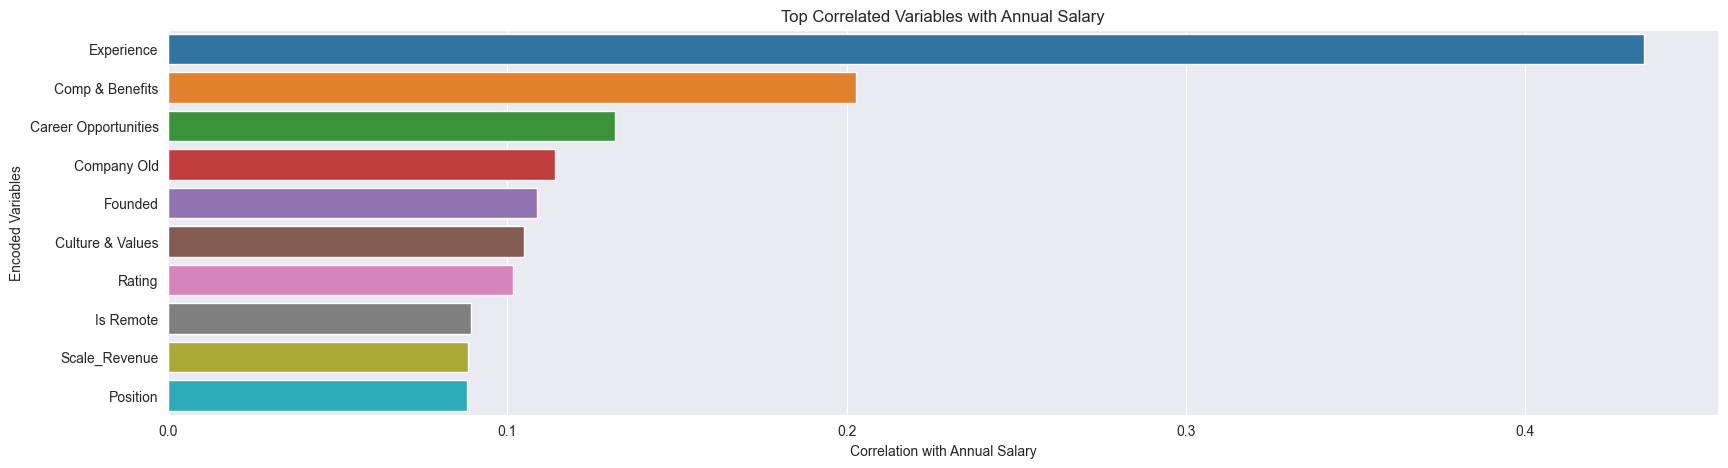

In [164]:
correlation_matrix = df_copy.corr()

predict = 'Annual Salary'

salary_correlations = correlation_matrix[predict].drop(predict)

sorted_correlations = salary_correlations.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 5))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.xlabel(f"Correlation with {predict}")
plt.ylabel('Encoded Variables')
plt.title(f"Top Correlated Variables with {predict}")
plt.show()


We can see that 'Experience' and 'Comp & Benefits' are the leading features
- We will remove outliers in this two features

# Checking for outliers


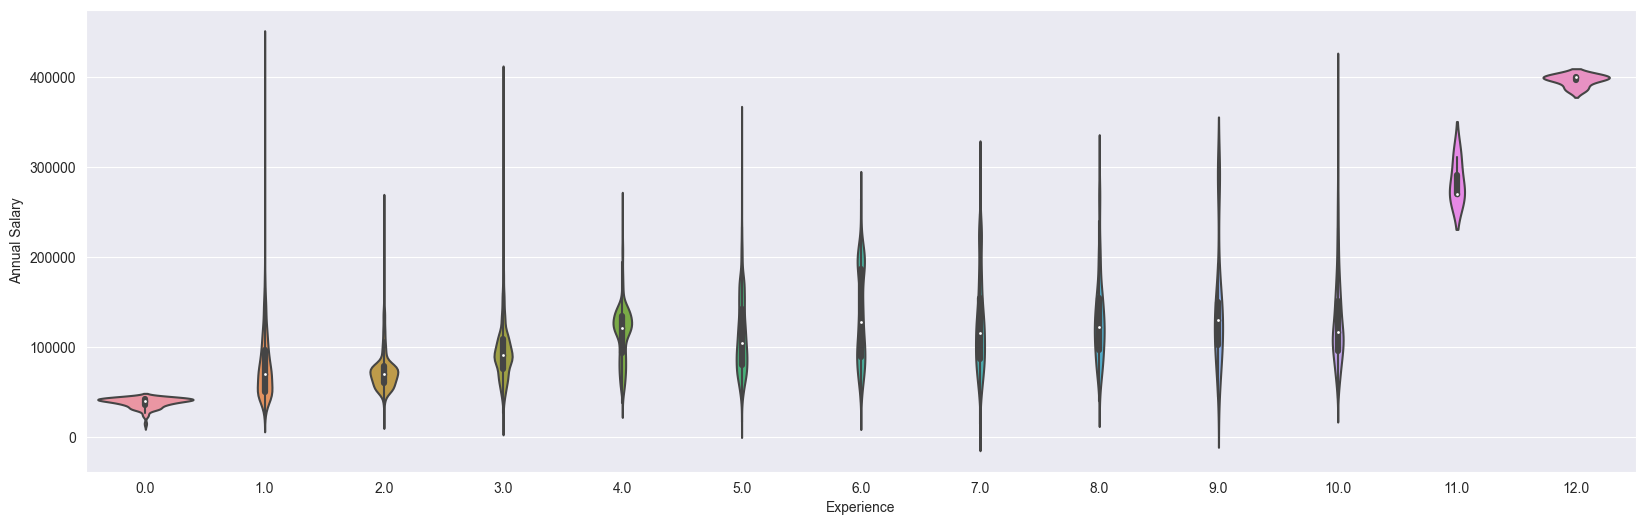

In [165]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Experience',y='Annual Salary', data=df_copy)
plt.show()


### Demand of experience

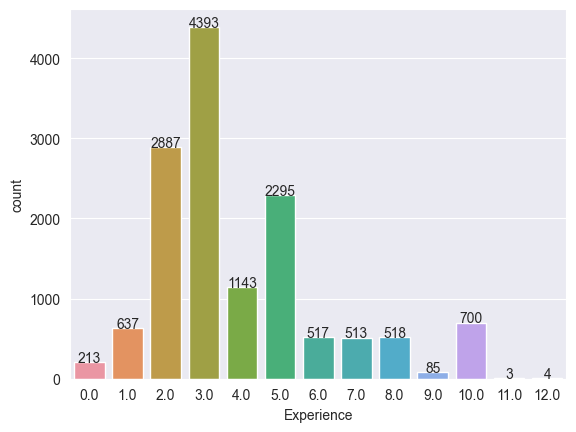

In [166]:
ax = sns.countplot(x='Experience', data=df_copy)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+0.2,
            s = '{:.0f}'.format(height),
            ha = 'center')

plt.show()

We can see here the demand in the market in terms of years of work experience.
- The highest demand is for 3 years of experience
- The lowest demand is for 11 years of experience or more

# Checking for outliers
 ### In the next section we will check outliers for each experience
  - Check how many jobs are outliers
  - Checking it in parentage from the total jobs in this experience category
  - We check from both ends of the data

  - First we check and then we drop it

Starting from the top edge

What we check: Exp = 1 and Salary > 140000
Total count:  637
Count:  41
In percentage: 6.44


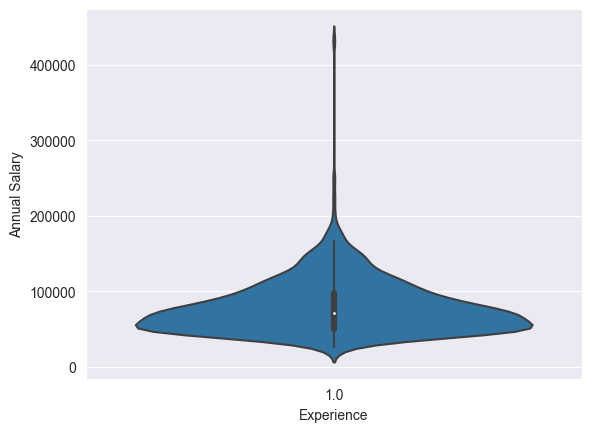

In [167]:
exp_to_check = 1
salary_to_check = 140000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [168]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 2 and Salary > 150000
Total count:  2887
Count:  47
In percentage: 1.63


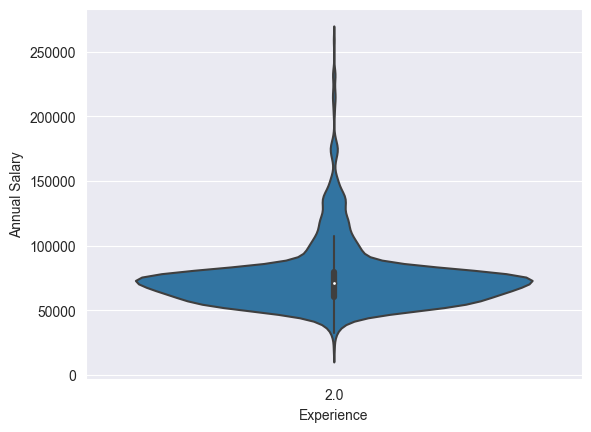

In [169]:
exp_to_check = 2
salary_to_check = 150000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [170]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 3 and Salary > 160000
Total count:  4393
Count:  210
In percentage: 4.78


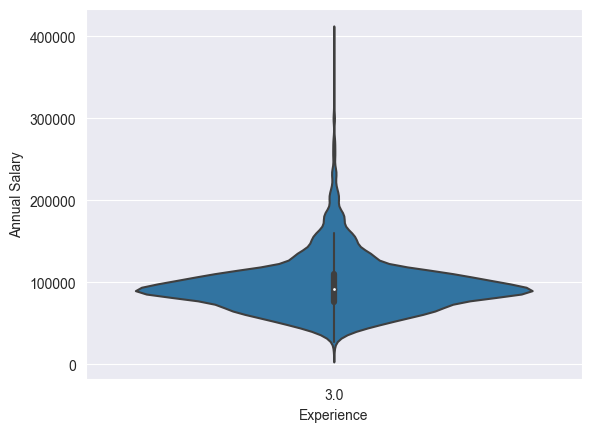

In [171]:
exp_to_check = 3
salary_to_check = 160000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [172]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 4 and Salary > 180000
Total count:  1143
Count:  28
In percentage: 2.45


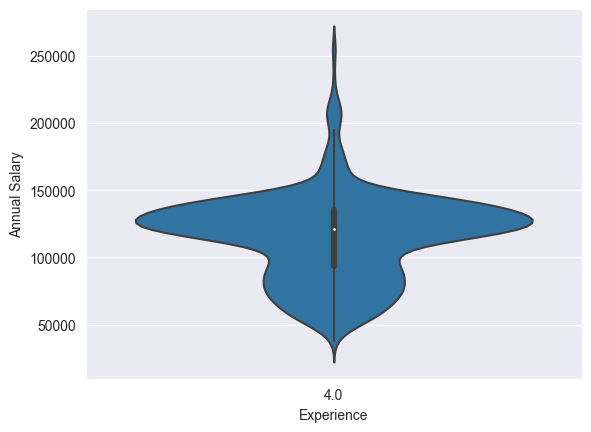

In [173]:
exp_to_check = 4
salary_to_check = 180000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [174]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 5 and Salary > 220000
Total count:  2295
Count:  26
In percentage: 1.13


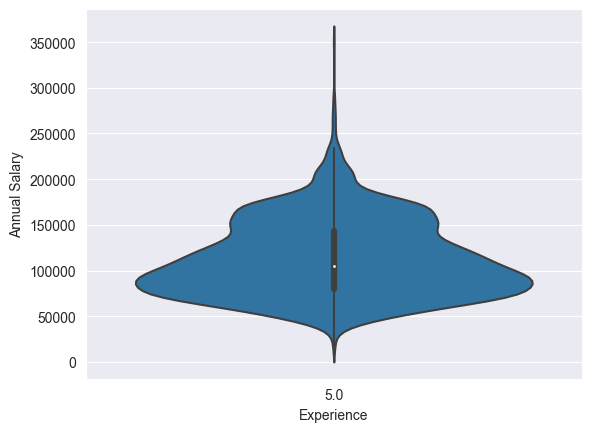

In [175]:
exp_to_check = 5
salary_to_check = 220000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [176]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 6 and Salary > 230000
Total count:  517
Count:  10
In percentage: 1.93


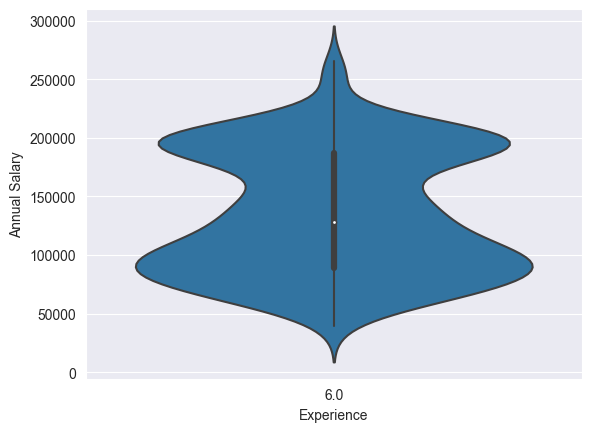

In [177]:
exp_to_check = 6
salary_to_check = 230000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [178]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 7 and Salary > 240000
Total count:  513
Count:  8
In percentage: 1.56


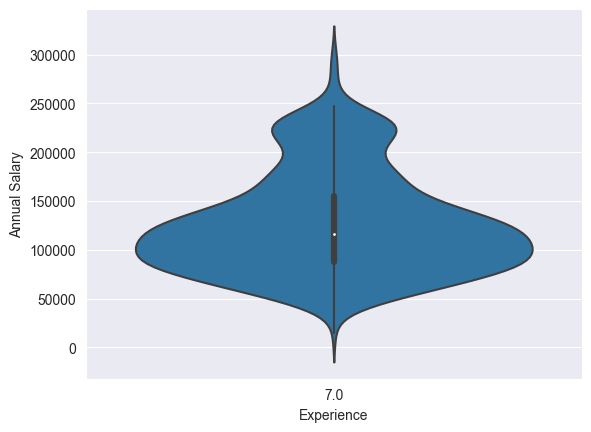

In [179]:
exp_to_check = 7
salary_to_check = 240000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [180]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 8 and Salary > 250000
Total count:  518
Count:  22
In percentage: 4.25


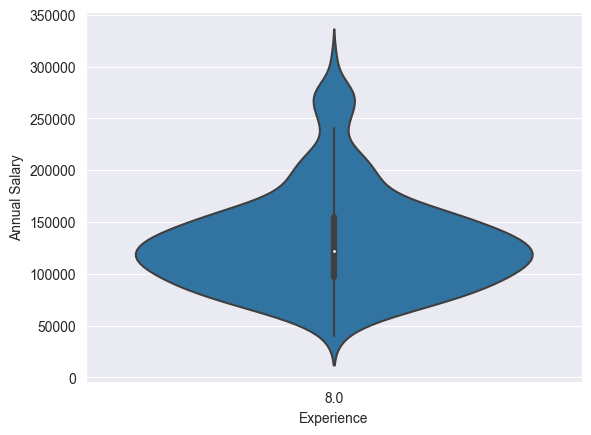

In [181]:
exp_to_check = 8
salary_to_check = 250000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [182]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 9 and Salary > 300000
Total count:  85
Count:  0
In percentage: 0.00


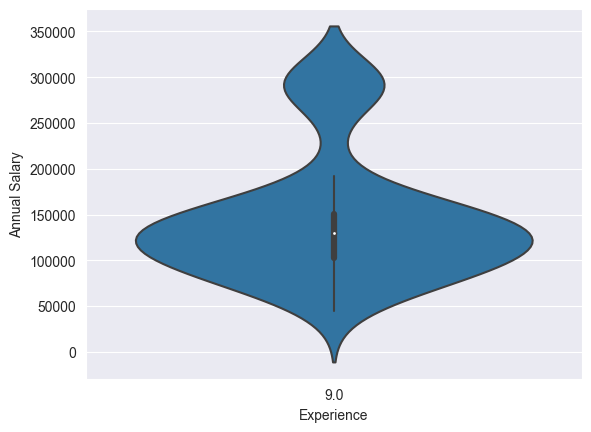

In [183]:
exp_to_check = 9
salary_to_check = 300000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [184]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 10 and Salary > 270000
Total count:  700
Count:  11
In percentage: 1.57


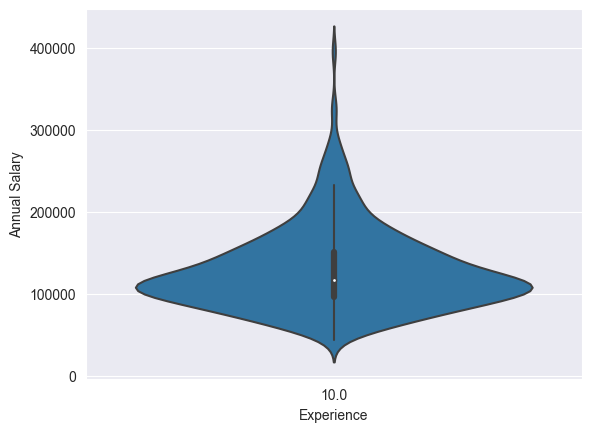

In [185]:
exp_to_check = 10
salary_to_check = 270000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [186]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)].index)


What we check: Exp = 11 and Salary > 350000
Total count:  3
Count:  0
In percentage: 0.00


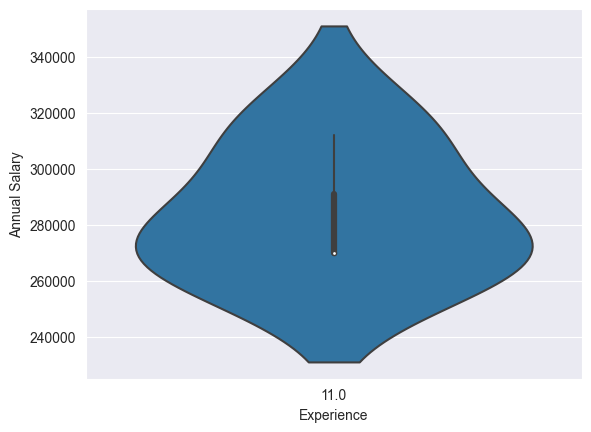

In [188]:
exp_to_check = 11
salary_to_check = 350000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] > salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary > {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

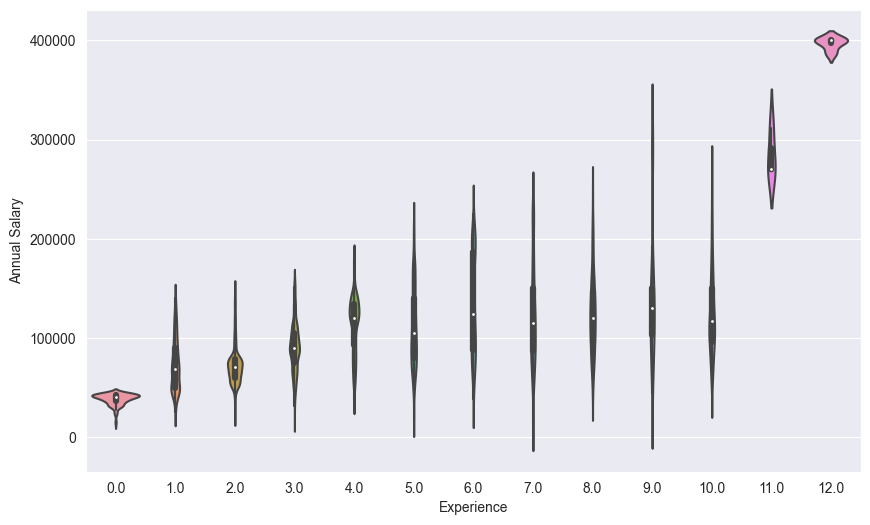

In [189]:
plt.figure(figsize=(10, 6))  # You can adjust the size as you need
sns.violinplot(x='Experience',y='Annual Salary', data=df_copy)
plt.show()


In [190]:
df_copy.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2929771587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.493218,0.054007,0.110751,0.098717,0.089193,-0.095507,0.101197,0.124263,0.193340,0.099242,0.075026,0.073969,0.060615,0.090468
Experience,0.493218,1.000000,0.116424,0.172799,0.053520,0.059651,-0.063019,0.039525,0.072217,0.105479,0.055246,0.055249,0.050711,0.015552,0.023657
Education,0.054007,0.116424,1.000000,0.300958,0.010749,0.027593,-0.039863,-0.052186,0.015420,0.013424,0.015888,0.023649,0.014998,-0.045175,-0.013377
Position,0.110751,0.172799,0.300958,1.000000,-0.036645,-0.001695,0.026210,0.090201,-0.047909,-0.016398,-0.006593,-0.048562,-0.011254,0.053086,0.060594
Rating,0.098717,0.053520,0.010749,-0.036645,1.000000,0.031028,-0.034044,0.005212,0.801823,0.730118,0.857554,0.841284,0.745538,-0.088072,-0.071067
Is Remote,0.089193,0.059651,0.027593,-0.001695,0.031028,1.000000,-0.090431,-0.104535,0.038602,0.033462,0.027440,0.052950,0.046627,-0.090006,-0.061754
Company Old,-0.095507,-0.063019,-0.039863,0.026210,-0.034044,-0.090431,1.000000,-0.034968,-0.059632,-0.089400,-0.062706,-0.100497,-0.082119,0.461626,0.300082
Founded,0.101197,0.039525,-0.052186,0.090201,0.005212,-0.104535,-0.034968,1.000000,0.024100,0.059768,0.021395,-0.038626,-0.019206,-0.022047,-0.008949
Career Opportunities,0.124263,0.072217,0.015420,-0.047909,0.801823,0.038602,-0.059632,0.024100,1.000000,0.765941,0.832545,0.851178,0.670503,-0.081482,-0.059876
Comp & Benefits,0.193340,0.105479,0.013424,-0.016398,0.730118,0.033462,-0.089400,0.059768,0.765941,1.000000,0.738390,0.720508,0.633825,-0.051050,0.001619


### Now we can see the differences it has made
- We removed the outliers from the top edge first
- 'Annual Salary' correlation with 'Experience' changed from 0.435237 to 0.493218

# Checking for outliers from bottom
### Now we will check outliers from the bottom

What we check: Exp = 1 and Salary < 30000
Total count:  596
Count:  3
In percentage: 0.50


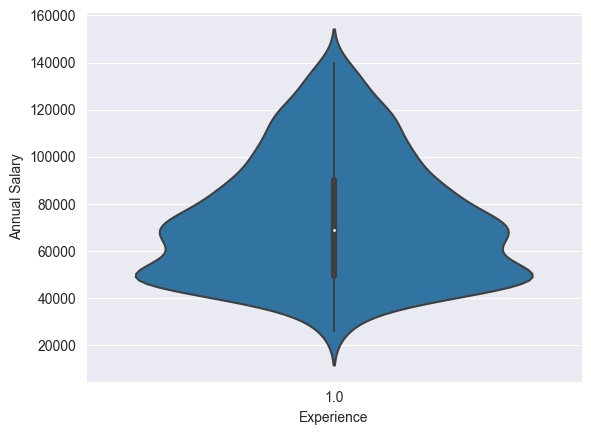

In [191]:
exp_to_check = 1
salary_to_check = 30000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

What we check: Exp = 2 and Salary < 45000
Total count:  2840
Count:  52
In percentage: 1.83


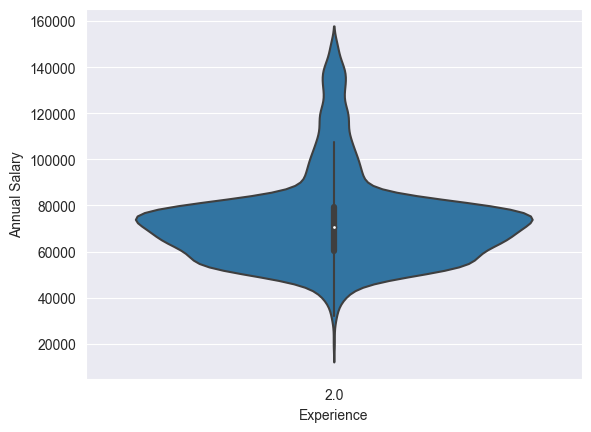

In [192]:
exp_to_check = 2
salary_to_check = 45000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [193]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)].index)


What we check: Exp = 3 and Salary < 45000
Total count:  4183
Count:  89
In percentage: 2.13


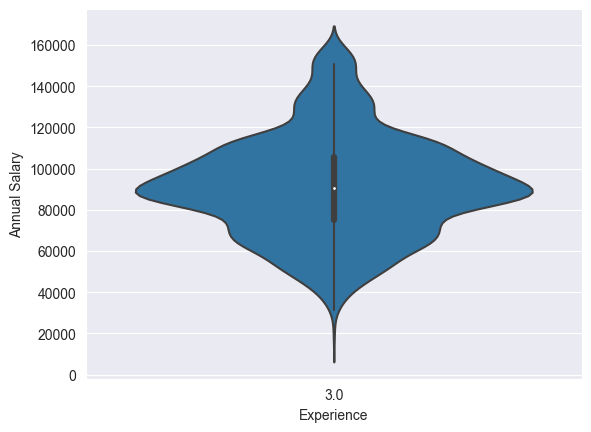

In [194]:
exp_to_check = 3
salary_to_check = 45000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [195]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)].index)


What we check: Exp = 4 and Salary < 50000
Total count:  1115
Count:  12
In percentage: 1.08


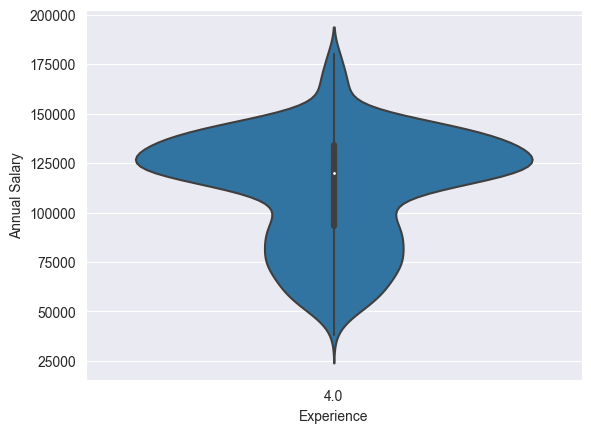

In [196]:
exp_to_check = 4
salary_to_check = 50000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

What we check: Exp = 5 and Salary < 50000
Total count:  2269
Count:  48
In percentage: 2.12


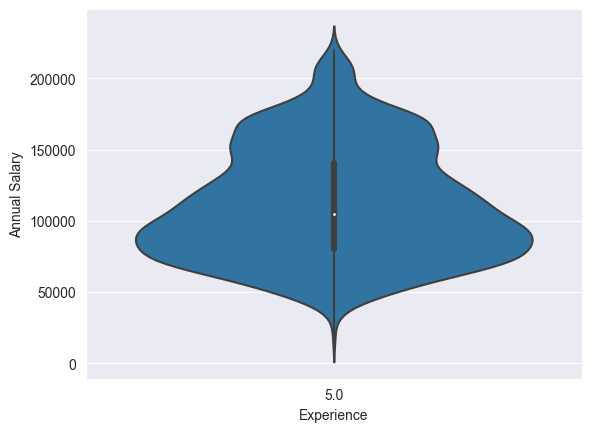

In [197]:
exp_to_check = 5
salary_to_check = 50000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [198]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)].index)


What we check: Exp = 6 and Salary < 50000
Total count:  507
Count:  5
In percentage: 0.99


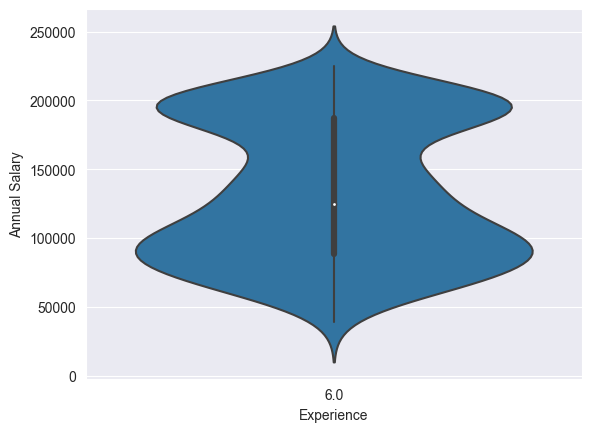

In [199]:
exp_to_check = 6
salary_to_check = 50000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

What we check: Exp = 7 and Salary < 50000
Total count:  505
Count:  4
In percentage: 0.79


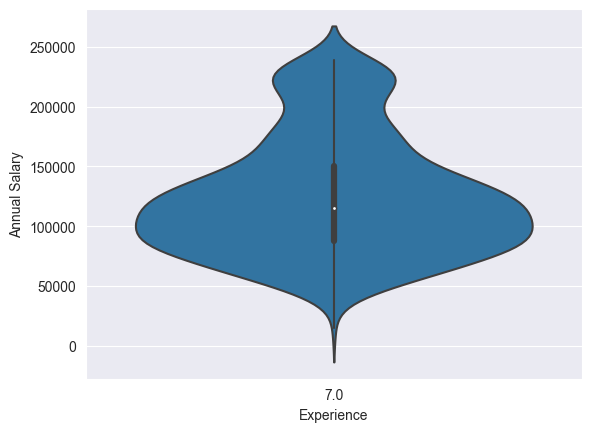

In [200]:
exp_to_check = 7
salary_to_check = 50000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [201]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)].index)


What we check: Exp = 8 and Salary < 50000
Total count:  496
Count:  3
In percentage: 0.60


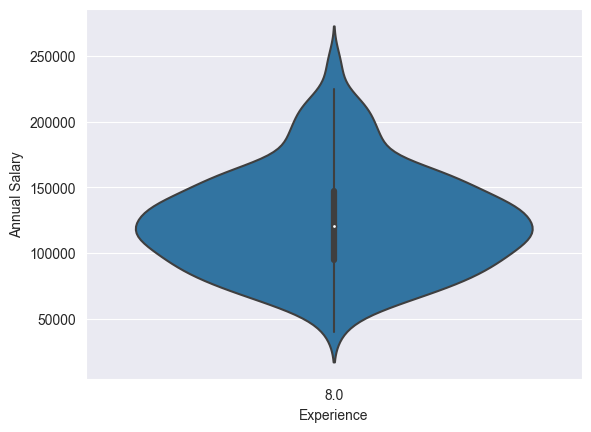

In [202]:
exp_to_check = 8
salary_to_check = 50000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [203]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)].index)


What we check: Exp = 9 and Salary < 50000
Total count:  85
Count:  1
In percentage: 1.18


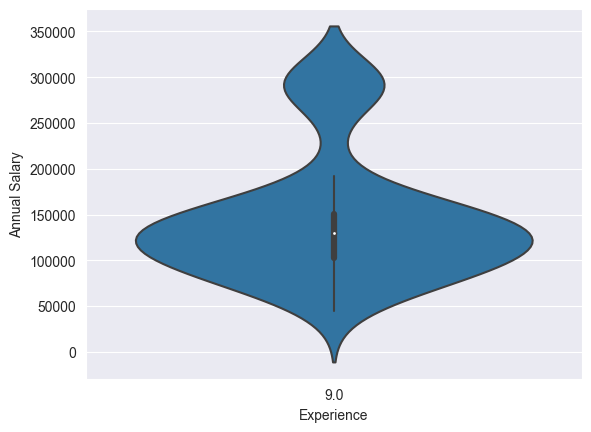

In [204]:
exp_to_check = 9
salary_to_check = 50000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/     (df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()

print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [205]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)].index)


What we check: Exp = 10 and Salary < 60000
Total count:  689
Count:  17
In percentage: 2.47


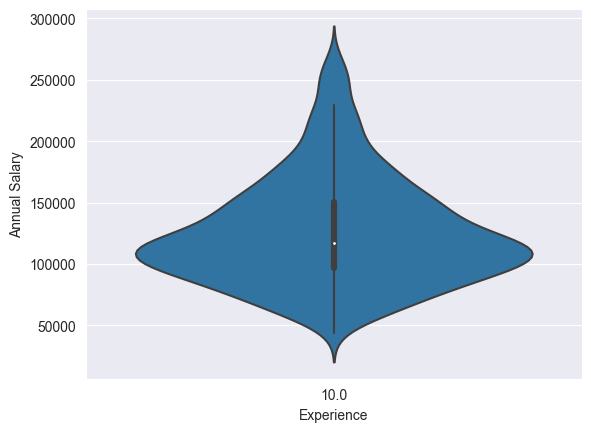

In [206]:
exp_to_check = 10
salary_to_check = 60000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

In [207]:
df_copy = df_copy.drop(df_copy[(df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)].index)


What we check: Exp = 11 and Salary < 50000
Total count:  3
Count:  0
In percentage: 0.00


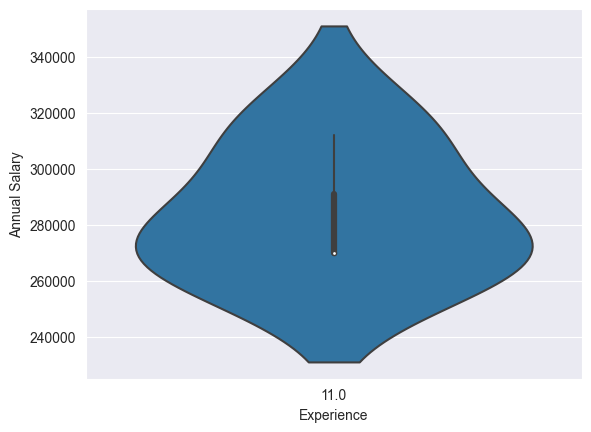

In [208]:
exp_to_check = 11
salary_to_check = 50000
filtered_df = df_copy[df_copy['Experience'] == exp_to_check]
sns.violinplot(x='Experience', y='Annual Salary', data=filtered_df)

percentage = ((((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum())/(df_copy["Experience"] == exp_to_check).sum()) * 100
count = ((df_copy["Experience"] == exp_to_check) & (df_copy["Annual Salary"] < salary_to_check)).sum()
total_count = (df_copy["Experience"] == exp_to_check).sum()
print(f"What we check: Exp = {exp_to_check} and Salary < {salary_to_check}")
print("Total count: ", total_count)
print("Count: ", count)
print("In percentage: {:.2f}".format(percentage))

plt.show()

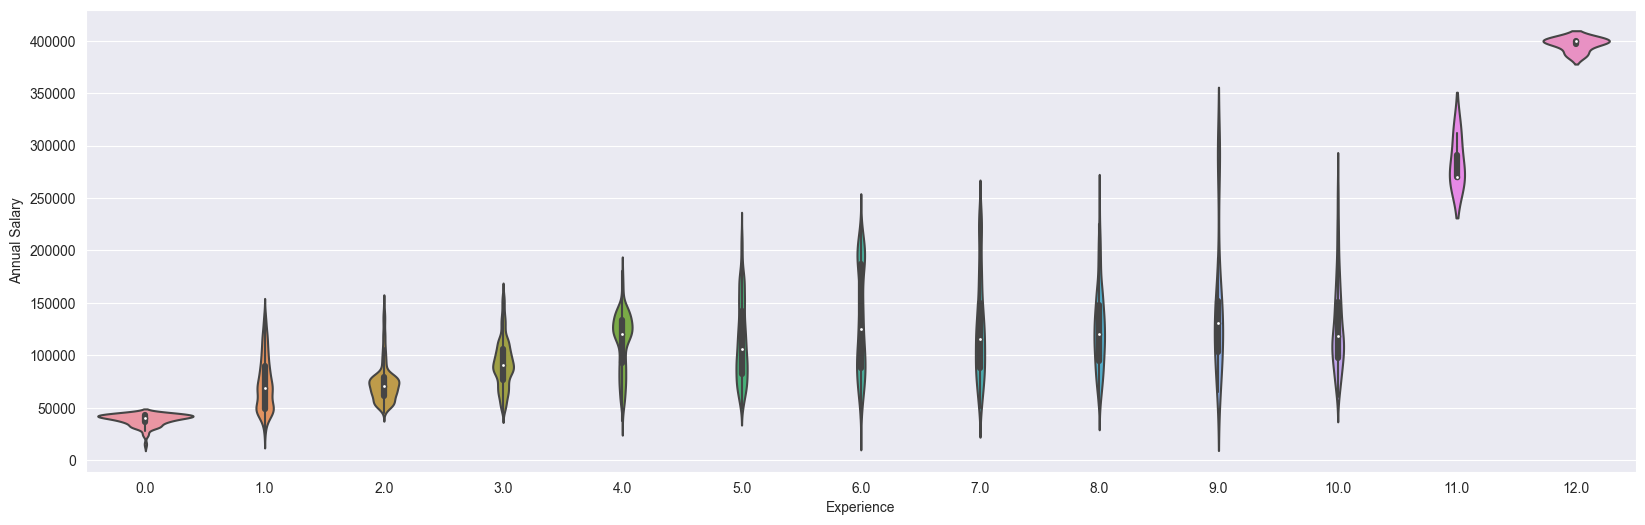

In [209]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Experience',y='Annual Salary', data=df_copy)
plt.show()


In [210]:
df_copy.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2929771587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.504554,0.047428,0.110012,0.093707,0.097408,-0.094558,0.099998,0.118613,0.188232,0.094367,0.070198,0.070159,0.063775,0.092768
Experience,0.504554,1.000000,0.115928,0.172991,0.053217,0.063758,-0.066114,0.040468,0.073353,0.105709,0.055703,0.054691,0.050006,0.015914,0.023999
Education,0.047428,0.115928,1.000000,0.295804,0.007573,0.027587,-0.040422,-0.052697,0.012697,0.008838,0.013070,0.020535,0.012525,-0.045086,-0.015071
Position,0.110012,0.172991,0.295804,1.000000,-0.038001,-0.001604,0.024952,0.090552,-0.048889,-0.018397,-0.007536,-0.050321,-0.012663,0.054653,0.061290
Rating,0.093707,0.053217,0.007573,-0.038001,1.000000,0.028629,-0.033825,0.005669,0.800865,0.729986,0.856665,0.840164,0.744377,-0.088396,-0.072008
Is Remote,0.097408,0.063758,0.027587,-0.001604,0.028629,1.000000,-0.089354,-0.104061,0.036245,0.031382,0.025575,0.050186,0.042211,-0.087998,-0.061912
Company Old,-0.094558,-0.066114,-0.040422,0.024952,-0.033825,-0.089354,1.000000,-0.037213,-0.059196,-0.089601,-0.062437,-0.100270,-0.081185,0.463323,0.302014
Founded,0.099998,0.040468,-0.052697,0.090552,0.005669,-0.104061,-0.037213,1.000000,0.023682,0.060517,0.022275,-0.038071,-0.019751,-0.023205,-0.009415
Career Opportunities,0.118613,0.073353,0.012697,-0.048889,0.800865,0.036245,-0.059196,0.023682,1.000000,0.766849,0.832205,0.850760,0.670004,-0.082289,-0.061096
Comp & Benefits,0.188232,0.105709,0.008838,-0.018397,0.729986,0.031382,-0.089601,0.060517,0.766849,1.000000,0.738945,0.720866,0.633642,-0.050972,0.001021


### Now we can see the differences it has made
- We removed the outliers from the bottom
- 'Annual Salary' correlation with 'Experience' changed from 0.493218 to 0.504554


C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2409144242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Comp & Benefits', y='Annual Salary', data=df_copy, ci=None)


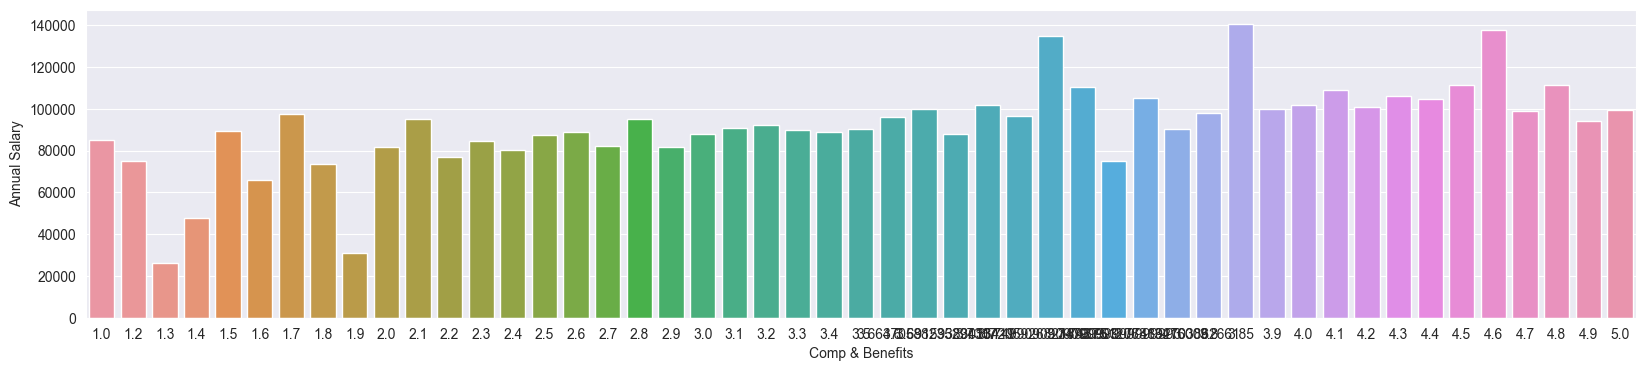

In [211]:
plt.figure(figsize=(20, 4))
barplot = sns.barplot(x='Comp & Benefits', y='Annual Salary', data=df_copy, ci=None)
plt.show()

There are some strange values. We will check them and remove them if needed

In [212]:
count = (df_copy['Comp & Benefits'] == 1.0).sum()
print("Sum of (df_copy['Comp & Benefits'] == 1.0): ", count)
count = (df_copy['Comp & Benefits'] == 1.3).sum()
print("Sum of (df_copy['Comp & Benefits'] == 1.3): ", count)
count = (df_copy['Comp & Benefits'] == 1.4).sum()
print("Sum of (df_copy['Comp & Benefits'] == 1.4): ", count)
count = (df_copy['Comp & Benefits'] == 1.6).sum()
print("Sum of (df_copy['Comp & Benefits'] == 1.6): ", count)
count = (df_copy['Comp & Benefits'] == 1.7).sum()
print("Sum of (df_copy['Comp & Benefits'] == 1.7): ", count)
count = (df_copy['Comp & Benefits'] == 1.9).sum()
print("Sum of (df_copy['Comp & Benefits'] == 1.9): ", count)

Sum of (df_copy['Comp & Benefits'] == 1.0):  48
Sum of (df_copy['Comp & Benefits'] == 1.3):  2
Sum of (df_copy['Comp & Benefits'] == 1.4):  11
Sum of (df_copy['Comp & Benefits'] == 1.6):  3
Sum of (df_copy['Comp & Benefits'] == 1.7):  9
Sum of (df_copy['Comp & Benefits'] == 1.9):  1


In [213]:
df_copy = df_copy[df_copy['Comp & Benefits'] != 1.3]
df_copy = df_copy[df_copy['Comp & Benefits'] != 1.4]
df_copy = df_copy[df_copy['Comp & Benefits'] != 1.6]
df_copy = df_copy[df_copy['Comp & Benefits'] != 1.7]
df_copy = df_copy[df_copy['Comp & Benefits'] != 1.9]


C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2409144242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Comp & Benefits', y='Annual Salary', data=df_copy, ci=None)


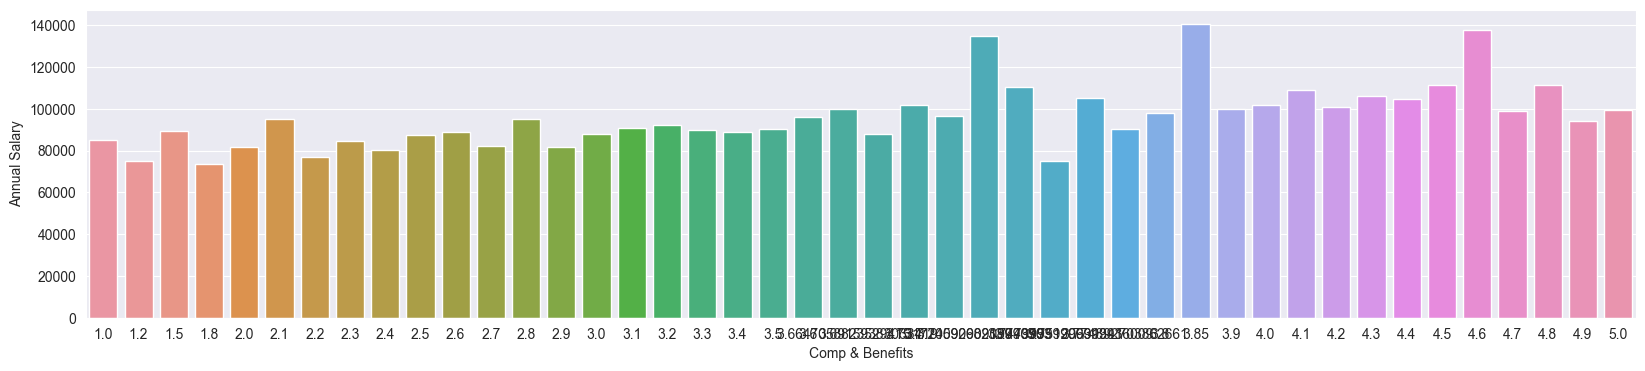

In [214]:
plt.figure(figsize=(20, 4))
barplot = sns.barplot(x='Comp & Benefits', y='Annual Salary', data=df_copy, ci=None)
plt.show()

In [215]:
df_copy.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2929771587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.503821,0.048826,0.109728,0.089952,0.098249,-0.095357,0.099282,0.114630,0.184192,0.091860,0.066926,0.066437,0.062418,0.092536
Experience,0.503821,1.000000,0.116998,0.172323,0.050771,0.064395,-0.066903,0.040643,0.071192,0.102508,0.054743,0.053326,0.048234,0.014362,0.023648
Education,0.048826,0.116998,1.000000,0.296737,0.008838,0.027084,-0.040067,-0.052993,0.014768,0.011996,0.013671,0.021720,0.014107,-0.044070,-0.014825
Position,0.109728,0.172323,0.296737,1.000000,-0.041770,-0.002016,0.024477,0.090531,-0.052662,-0.023294,-0.011288,-0.053281,-0.015623,0.053763,0.061093
Rating,0.089952,0.050771,0.008838,-0.041770,1.000000,0.029931,-0.035132,0.000268,0.797627,0.725735,0.855233,0.838242,0.740612,-0.090941,-0.073842
Is Remote,0.098249,0.064395,0.027084,-0.002016,0.029931,1.000000,-0.089678,-0.103550,0.037154,0.032989,0.025718,0.051092,0.043495,-0.088557,-0.062178
Company Old,-0.095357,-0.066903,-0.040067,0.024477,-0.035132,-0.089678,1.000000,-0.036926,-0.061068,-0.093007,-0.063850,-0.101723,-0.083059,0.463085,0.301981
Founded,0.099282,0.040643,-0.052993,0.090531,0.000268,-0.103550,-0.036926,1.000000,0.017994,0.055334,0.016396,-0.043931,-0.025657,-0.022563,-0.009230
Career Opportunities,0.114630,0.071192,0.014768,-0.052662,0.797627,0.037154,-0.061068,0.017994,1.000000,0.761853,0.830139,0.848790,0.663506,-0.085632,-0.062802
Comp & Benefits,0.184192,0.102508,0.011996,-0.023294,0.725735,0.032989,-0.093007,0.055334,0.761853,1.000000,0.736558,0.717773,0.626138,-0.055805,0.000173


Removing outliers didn't make real change

### In this section, we will focus on 4 features that are categorical and we want to check their correlation to the Annual Salary
- 'Sector'
- 'Industry'
- 'Location'
- 'Time Unit'

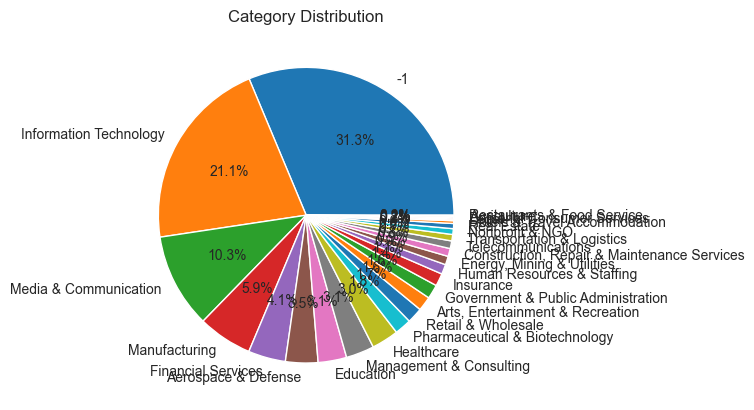

In [216]:
counts = df_copy['Sector'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title('Category Distribution')
plt.show()

We can see here that are a lot of '-1' values so we will remove them


In [217]:
df_copy = df_copy[df_copy['Sector'] != '-1']
print(df_copy.shape)

(9112, 25)


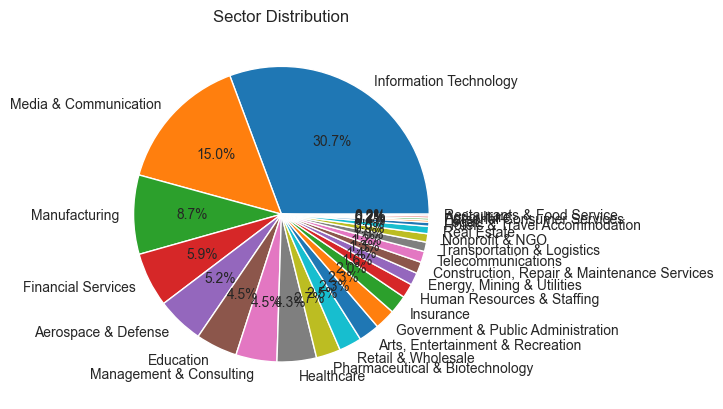

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\992634648.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Sector', y='Annual Salary', data=df_copy, ci=None)


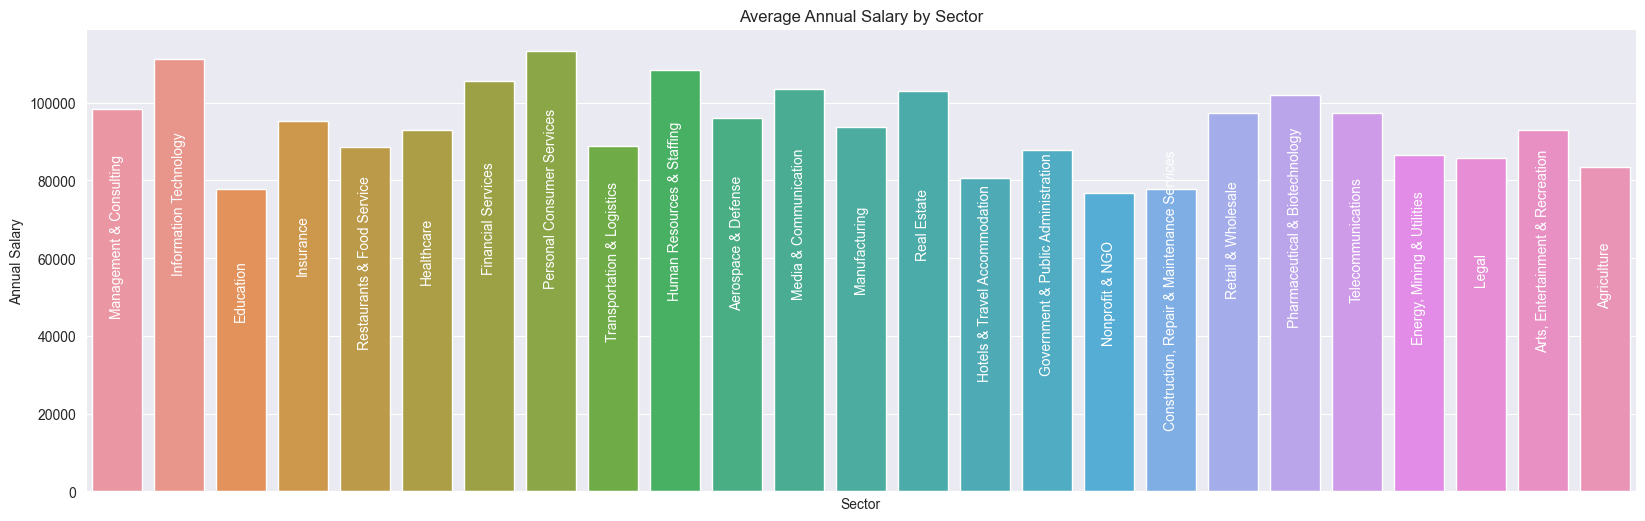

In [218]:
counts = df_copy['Sector'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title('Sector Distribution')
plt.show()


plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Sector', y='Annual Salary', data=df_copy, ci=None)

# Get the x-tick labels
x_labels = barplot.get_xticklabels()

for bar, label in zip(barplot.patches, x_labels):
    barplot.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() - bar.get_height()/3,  # Adjust as needed
                 label.get_text(),
                 ha='center',
                 va='center',
                 color='white',
                 rotation='vertical')  # Rotate text

plt.title("Average Annual Salary by Sector")
plt.xticks([])  # this removes x-label names
plt.show()



### On the upper pie
'Information Technology' is the leading with most jobs.

### On the lower chart
We can see that there is no linear correlation with 'Annual Salary'

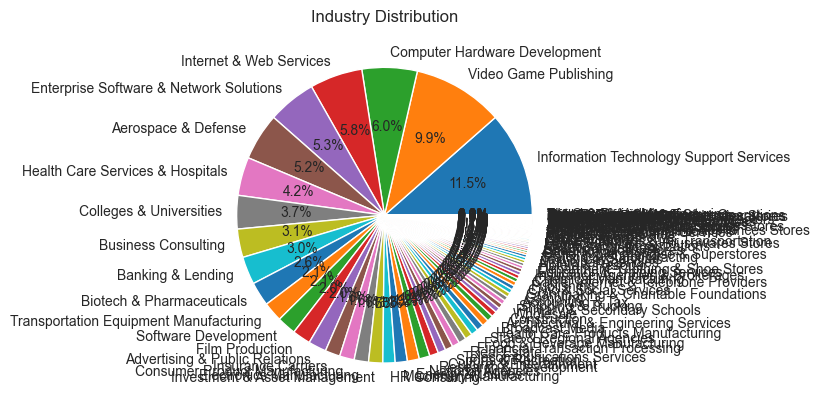

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\1575822035.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Industry', y='Annual Salary', data=df_copy, ci=None)


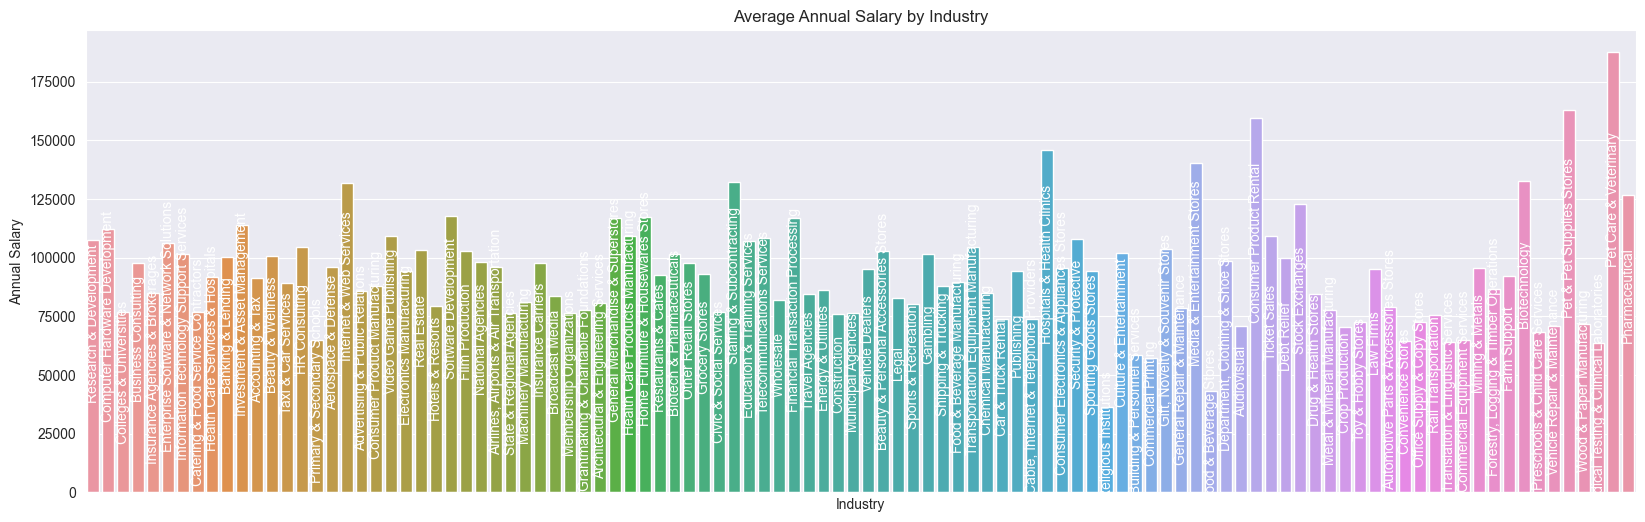

In [219]:
counts = df_copy['Industry'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title('Industry Distribution')
plt.show()



plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Industry', y='Annual Salary', data=df_copy, ci=None)

# Get the x-tick labels
x_labels = barplot.get_xticklabels()

for bar, label in zip(barplot.patches, x_labels):
    barplot.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() - bar.get_height()/3,  # Adjust as needed
                 label.get_text(),
                 ha='center',
                 va='center',
                 color='white',
                 rotation='vertical')  # Rotate text

plt.title("Average Annual Salary by Industry")
plt.xticks([])  # this removes x-label names
plt.show()



### On the upper pie
'Information Technology Support Services' is the leading with most jobs.

### On the lower chart
We can see that there is no linear correlation with 'Annual Salary'

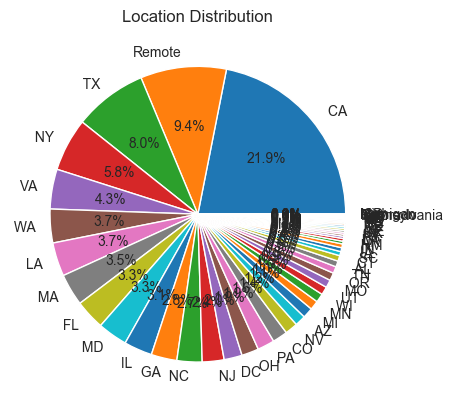

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\1607893056.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Location', y='Annual Salary', data=df_copy, ci=None)


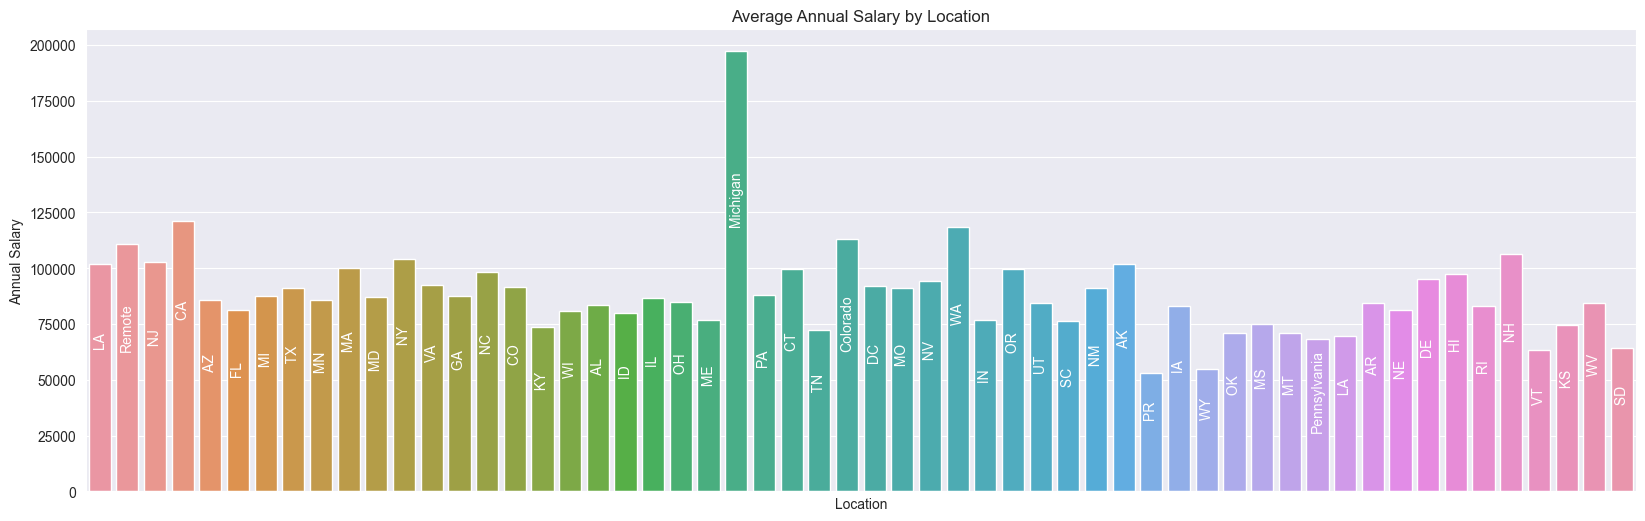

In [220]:
counts = df_copy['Location'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title('Location Distribution')
plt.show()



plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Location', y='Annual Salary', data=df_copy, ci=None)

# Get the x-tick labels
x_labels = barplot.get_xticklabels()

for bar, label in zip(barplot.patches, x_labels):
    barplot.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() - bar.get_height()/3,  # Adjust as needed
                 label.get_text(),
                 ha='center',
                 va='center',
                 color='white',
                 rotation='vertical')  # Rotate text

plt.title("Average Annual Salary by Location")
plt.xticks([])  # this removes x-label names
plt.show()



In [221]:
count = (df_copy['Location'] == 'Michigan').sum()
print(count)

1


In [222]:
df_copy = df_copy[df_copy['Location'] != 'Michigan']


### On the upper pie
'CA' is the leading with most jobs.

### On the lower chart
'Michigan' is above all, but there is only 1 job, it is an outlier and we remove it.
We can see that there is no linear correlation with 'Annual Salary'

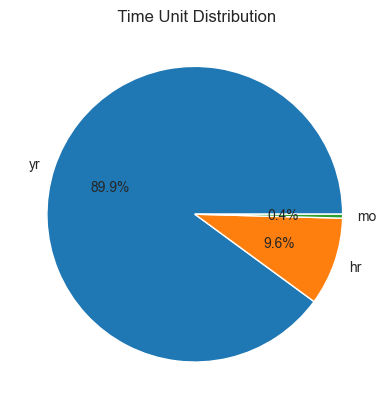

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\3986227400.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Time Unit', y='Annual Salary', data=df_copy, ci=None)


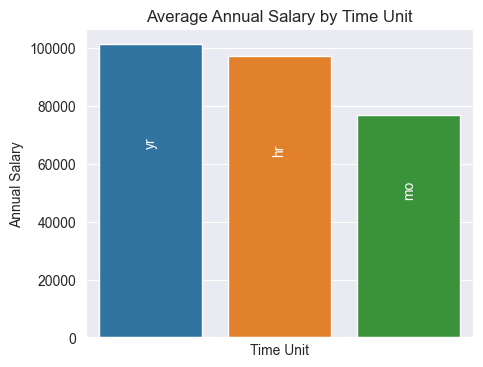

In [223]:
counts = df_copy['Time Unit'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('')  # This removes the ylabel
plt.title(' Time Unit Distribution')
plt.show()



plt.figure(figsize=(5, 4))
barplot = sns.barplot(x='Time Unit', y='Annual Salary', data=df_copy, ci=None)

# Get the x-tick labels
x_labels = barplot.get_xticklabels()

for bar, label in zip(barplot.patches, x_labels):
    barplot.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() - bar.get_height()/3,  # Adjust as needed
                 label.get_text(),
                 ha='center',
                 va='center',
                 color='white',
                 rotation='vertical')  # Rotate text

plt.title("Average Annual Salary by Time Unit")
plt.xticks([])  # this removes x-label names
plt.show()

### On the upper pie
'yr' is the leading with most jobs -> most of the jobs pay a yearly salary

### On the lower chart
We can see that there is no linear correlation with 'Annual Salary'

In [224]:
df_copy.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_25032\2929771587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance,Scale_Company_Size,Scale_Revenue
Annual Salary,1.000000,0.510176,0.062607,0.124211,0.121640,0.083971,-0.118317,0.118317,0.145183,0.240817,0.121743,0.081882,0.081294,0.070828,0.105938
Experience,0.510176,1.000000,0.128679,0.199326,0.057976,0.052669,-0.084665,0.084665,0.068816,0.115396,0.059278,0.049896,0.055542,0.018436,0.033235
Education,0.062607,0.128679,1.000000,0.328012,0.004668,0.011638,-0.046670,0.046670,0.010747,0.011721,0.010618,0.014822,0.008151,-0.052871,-0.015078
Position,0.124211,0.199326,0.328012,1.000000,-0.056870,0.004711,0.032206,-0.032206,-0.071254,-0.039985,-0.024730,-0.069349,-0.022148,0.067168,0.075063
Rating,0.121640,0.057976,0.004668,-0.056870,1.000000,0.004393,-0.050378,0.050378,0.867187,0.751106,0.914148,0.906125,0.790016,-0.125938,-0.101162
Is Remote,0.083971,0.052669,0.011638,0.004711,0.004393,1.000000,-0.122556,0.122556,0.016123,0.021169,0.003846,0.038273,0.034144,-0.120569,-0.088207
Company Old,-0.118317,-0.084665,-0.046670,0.032206,-0.050378,-0.122556,1.000000,-1.000000,-0.088543,-0.126743,-0.084495,-0.136018,-0.107269,0.460966,0.298058
Founded,0.118317,0.084665,0.046670,-0.032206,0.050378,0.122556,-1.000000,1.000000,0.088543,0.126743,0.084495,0.136018,0.107269,-0.460966,-0.298058
Career Opportunities,0.145183,0.068816,0.010747,-0.071254,0.867187,0.016123,-0.088543,0.088543,1.000000,0.765961,0.850118,0.870680,0.685026,-0.118784,-0.086142
Comp & Benefits,0.240817,0.115396,0.011721,-0.039985,0.751106,0.021169,-0.126743,0.126743,0.765961,1.000000,0.723101,0.711169,0.596759,-0.074715,0.000664


 After removing jobs with the missing values we can see that the correlation between 'Annual Salary' and 'Experience' & 'Comp & Benefits' has grown up


# In this section we want to transfer the categorical features to binary to use them in the model
- For this transfer, we use 'One Hot Encoder'
- There are two Dataframes, and we will try them both for checking which is the best Dataframe

In [225]:
one_hot_full_features = pd.get_dummies(df_copy[['Sector', 'Industry','Time Unit','Location']])
one_hot_half_feature = pd.get_dummies(df_copy[['Sector','Location']])

# Drop columns 'Sector' and 'Industry' as they are now encoded
df_full_feature = df_copy.drop(['Sector', 'Industry','Time Unit','Location'], axis=1)
df_half_feature = df_copy.drop(['Sector', 'Location'], axis=1)

# Join the encoded DataFrame
df_full_feature = df_full_feature.join(one_hot_full_features)
df_half_feature = df_half_feature.join(one_hot_half_feature)

print("full features:", df_full_feature.shape)
print("half features :" , df_half_feature.shape)


full features: (9111, 208)
half features : (9111, 103)


Removing all Non Numeric Columns

In [226]:
df_numeric_full_features = df_full_feature.select_dtypes(include='number')
df_numeric_half_features = df_half_feature.select_dtypes(include='number')
print("full features:", df_numeric_full_features.shape)
print("half features :" , df_numeric_half_features.shape)

full features: (9111, 202)
half features : (9111, 95)


In [228]:
df_numeric_full_features.corr()

,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Location_ VA,Location_ VT,Location_ WA,Location_ WI,Location_ WV,Location_ WY,Location_Colorado,Location_LA,Location_Pennsylvania,Location_Remote
Annual Salary,1.000000,0.510176,0.062607,0.124211,0.121640,0.083971,-0.118317,0.118317,0.145183,0.240817,...,-0.045969,-0.028677,0.088936,-0.050066,-0.012415,-0.024861,0.005802,0.005135,-0.015278,0.083971
Experience,0.510176,1.000000,0.128679,0.199326,0.057976,0.052669,-0.084665,0.084665,0.068816,0.115396,...,0.018515,-0.008063,0.023615,-0.043852,0.020400,-0.023455,0.008389,-0.013249,-0.016211,0.052669
Education,0.062607,0.128679,1.000000,0.328012,0.004668,0.011638,-0.046670,0.046670,0.010747,0.011721,...,-0.033493,-0.008368,0.016920,-0.000099,0.005405,0.000576,0.000499,-0.017756,0.000499,0.011638
Position,0.124211,0.199326,0.328012,1.000000,-0.056870,0.004711,0.032206,-0.032206,-0.071254,-0.039985,...,-0.035562,0.005820,0.022793,0.023214,0.005820,-0.007131,-0.007799,-0.005299,0.018172,0.004711
Rating,0.121640,0.057976,0.004668,-0.056870,1.000000,0.004393,-0.050378,0.050378,0.867187,0.751106,...,0.095616,-0.008508,-0.016531,0.028662,-0.013281,-0.001906,-0.007644,-0.009311,0.004044,0.004393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Location_ WY,-0.024861,-0.023455,0.000576,-0.007131,-0.001906,-0.006744,0.019494,-0.019494,-0.002303,-0.008487,...,-0.004467,-0.000621,-0.004101,-0.002058,-0.000621,1.000000,-0.000380,-0.004095,-0.000380,-0.006744
Location_Colorado,0.005802,0.008389,0.000499,-0.007799,-0.007644,-0.005840,0.010352,-0.010352,-0.006255,-0.004258,...,-0.003869,-0.000538,-0.003551,-0.001782,-0.000538,-0.000380,1.000000,-0.003546,-0.000329,-0.005840
Location_LA,0.005135,-0.013249,-0.017756,-0.005299,-0.009311,-0.062874,-0.006278,0.006278,-0.013805,-0.018970,...,-0.041647,-0.005792,-0.038231,-0.019184,-0.005792,-0.004095,-0.003546,1.000000,-0.003546,-0.062874
Location_Pennsylvania,-0.015278,-0.016211,0.000499,0.018172,0.004044,-0.005840,-0.002645,0.002645,0.001049,0.008105,...,-0.003869,-0.000538,-0.003551,-0.001782,-0.000538,-0.000380,-0.000329,-0.003546,1.000000,-0.005840


In [229]:
df_numeric_half_features.corr()

,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Location_ VA,Location_ VT,Location_ WA,Location_ WI,Location_ WV,Location_ WY,Location_Colorado,Location_LA,Location_Pennsylvania,Location_Remote
Annual Salary,1.000000,0.510176,0.062607,0.124211,0.121640,0.083971,-0.118317,0.118317,0.145183,0.240817,...,-0.045969,-0.028677,0.088936,-0.050066,-0.012415,-0.024861,0.005802,0.005135,-0.015278,0.083971
Experience,0.510176,1.000000,0.128679,0.199326,0.057976,0.052669,-0.084665,0.084665,0.068816,0.115396,...,0.018515,-0.008063,0.023615,-0.043852,0.020400,-0.023455,0.008389,-0.013249,-0.016211,0.052669
Education,0.062607,0.128679,1.000000,0.328012,0.004668,0.011638,-0.046670,0.046670,0.010747,0.011721,...,-0.033493,-0.008368,0.016920,-0.000099,0.005405,0.000576,0.000499,-0.017756,0.000499,0.011638
Position,0.124211,0.199326,0.328012,1.000000,-0.056870,0.004711,0.032206,-0.032206,-0.071254,-0.039985,...,-0.035562,0.005820,0.022793,0.023214,0.005820,-0.007131,-0.007799,-0.005299,0.018172,0.004711
Rating,0.121640,0.057976,0.004668,-0.056870,1.000000,0.004393,-0.050378,0.050378,0.867187,0.751106,...,0.095616,-0.008508,-0.016531,0.028662,-0.013281,-0.001906,-0.007644,-0.009311,0.004044,0.004393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Location_ WY,-0.024861,-0.023455,0.000576,-0.007131,-0.001906,-0.006744,0.019494,-0.019494,-0.002303,-0.008487,...,-0.004467,-0.000621,-0.004101,-0.002058,-0.000621,1.000000,-0.000380,-0.004095,-0.000380,-0.006744
Location_Colorado,0.005802,0.008389,0.000499,-0.007799,-0.007644,-0.005840,0.010352,-0.010352,-0.006255,-0.004258,...,-0.003869,-0.000538,-0.003551,-0.001782,-0.000538,-0.000380,1.000000,-0.003546,-0.000329,-0.005840
Location_LA,0.005135,-0.013249,-0.017756,-0.005299,-0.009311,-0.062874,-0.006278,0.006278,-0.013805,-0.018970,...,-0.041647,-0.005792,-0.038231,-0.019184,-0.005792,-0.004095,-0.003546,1.000000,-0.003546,-0.062874
Location_Pennsylvania,-0.015278,-0.016211,0.000499,0.018172,0.004044,-0.005840,-0.002645,0.002645,0.001049,0.008105,...,-0.003869,-0.000538,-0.003551,-0.001782,-0.000538,-0.000380,-0.000329,-0.003546,1.000000,-0.005840


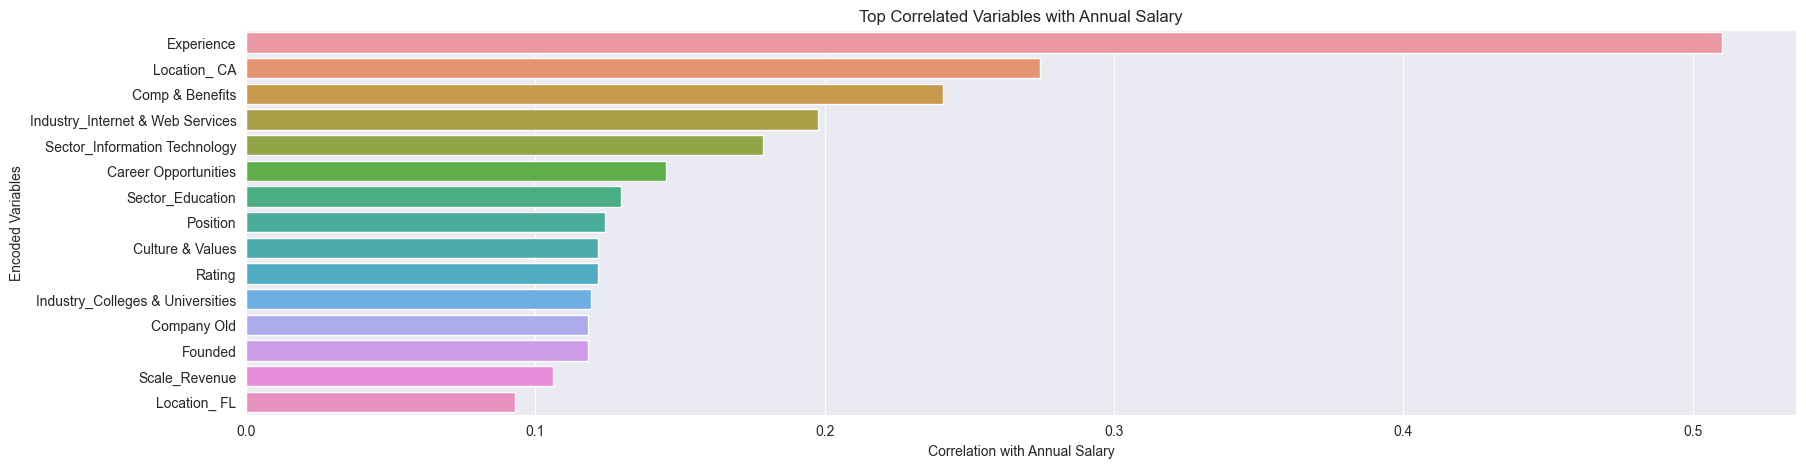

In [230]:
correlation_matrix = df_numeric_full_features.corr()

predict = 'Annual Salary'

salary_correlations = correlation_matrix[predict].drop(predict)

sorted_correlations = salary_correlations.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(20, 5))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.xlabel(f"Correlation with {predict}")
plt.ylabel('Encoded Variables')
plt.title(f"Top Correlated Variables with {predict}")
plt.show()

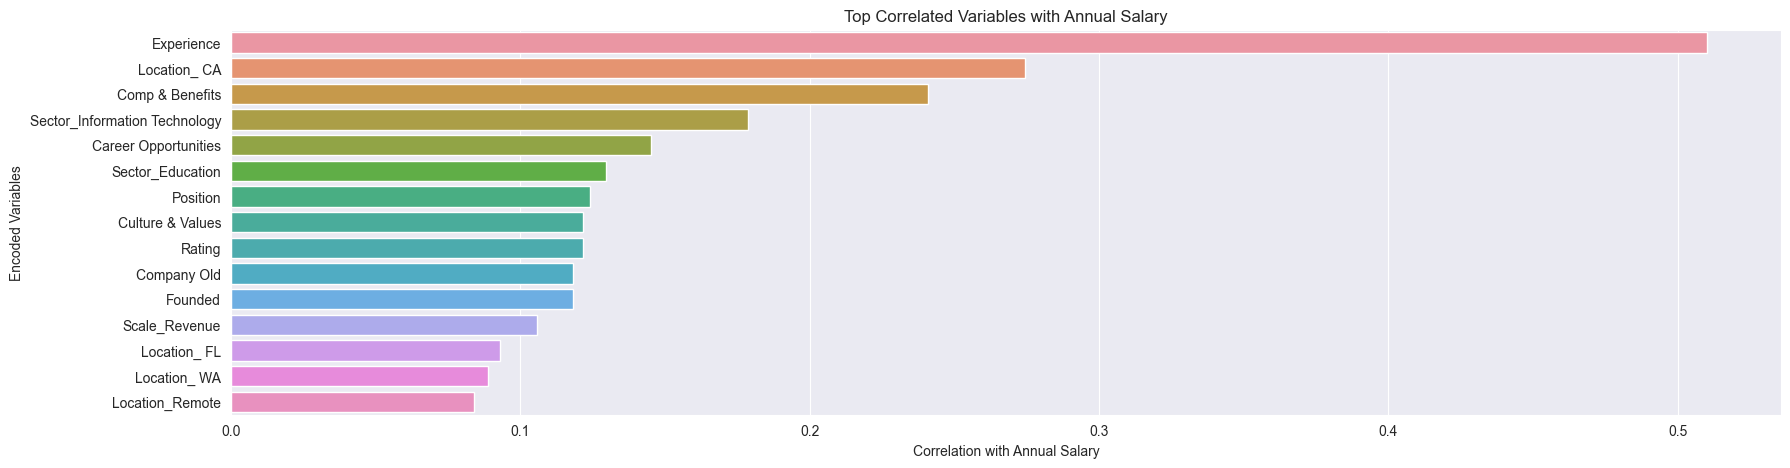

In [231]:
correlation_matrix = df_numeric_half_features.corr()

predict = 'Annual Salary'

salary_correlations = correlation_matrix[predict].drop(predict)

sorted_correlations = salary_correlations.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(20, 5))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.xlabel(f"Correlation with {predict}")
plt.ylabel('Encoded Variables')
plt.title(f"Top Correlated Variables with {predict}")
plt.show()

# Build and train Linear Regression model - Dataframe with full features

In [240]:
start_time = time.time()

X = df_numeric_full_features.drop(['Annual Salary','Education'], axis=1)
y = df_numeric_full_features["Annual Salary"]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
linear_full_features = linear_model.LinearRegression()
linear_full_features.fit(x_train, y_train)
counter_of_negative_values_full = 0
best_full = 0.0
for _ in range(10000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
    linear_full_features = linear_model.LinearRegression()
    linear_full_features.fit(x_train, y_train)
    accuracy = linear_full_features.score(x_test, y_test)
    if accuracy < 0:
        counter_of_negative_values_full += 1

    print(accuracy)

    if accuracy > best_full:
        best_full = accuracy
        print(f"best = {best_full}")
        # Saving the best model
        best_full_model = linear_full_features


print(f"best of all-full :{best_full}")

end_time = time.time()
execution_time_full = end_time - start_time

print(f"Time taken to run the code: {execution_time_full:.2f} seconds")


0.39763787598960376
best = 0.39763787598960376
-22614365.537027426
-15409797545.052567
0.4038217370422744
best = 0.4038217370422744
-7155959118864.125
-19213422549559.848
0.43165338931760144
best = 0.43165338931760144
0.41296940392100023
0.44343976740143276
best = 0.44343976740143276
-22716823.43341577
-11728076335.637203
-3377167147699.809
0.4724622633097315
best = 0.4724622633097315
-109653108228.15627
-230892972391.70682
-4745793237744.241
-1302743241.0168278
-104921072242098.73
-398106675902.9613
-4642381046709.216
-13331072160515.121
-38996185487005.734
-2801836419774.3438
-41047797688.49536
-1841889810991.5793
-926615894939.2866
0.4422933760585499
-17493289481095.865
0.4545532329259706
-2903760138251.5366
-28889256709.163086
-1395185316.32499
0.4204149463584119
-203867000.50348982
-9019698176.46555
0.3920992066591835
0.4338835072655969
-447174302498.7701
0.38952225338005897
-464036084228.44684
-6261401465237.121
-25376954632326.22
-3363119668.4898357
-1179353763833.309
0.43297753

# Build and train Linear Regression model - Dataframe with half features


In [241]:
start_time = time.time()

X = df_numeric_half_features.drop(['Annual Salary','Education'], axis=1)
y = df_numeric_half_features["Annual Salary"]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
linear_half_features = linear_model.LinearRegression()
linear_half_features.fit(x_train, y_train)
counter_of_negative_values_half = 0
best_half = 0.0
for _ in range(10000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
    linear_half_features = linear_model.LinearRegression()
    linear_half_features.fit(x_train, y_train)
    accuracy = linear_half_features.score(x_test, y_test)
    if accuracy < 0:
        counter_of_negative_values_half += 1

    print(accuracy)

    if accuracy > best_half:
        best_half = accuracy
        print(f"best = {best_half}")
        # Saving the best model
        best_half_model = linear_half_features


print(f"best of all-half ={best_half}")


end_time = time.time()
execution_time_half = end_time - start_time

print(f"Time taken to run the code: {execution_time_half:.2f} seconds")

0.4710922458509309
best = 0.4710922458509309
0.4080821752526699
0.4016569062863846
0.3949916722268121
0.4168298354126664
0.346060370952479
0.3843593546768894
0.39518242695089534
0.46837069745249693
0.4010314068087564
0.38635394193960837
0.39710746067866953
0.4245669835559045
0.42393414858564615
0.40122576026503065
0.4045072555635242
0.4001688376269482
0.3992809085424319
0.41173620342461215
0.434313025334771
0.4235817586525711
0.4284716421971998
-10.55285322737291
0.40085441821740897
0.41497603903613
0.3964467383516336
0.433238820987782
0.4413925254349419
0.4004847753557853
0.3343062034643899
0.37415153025003256
0.4615628305515316
0.42691467383736303
0.3933177761171285
0.39785714481231627
0.42857780346981356
0.41071571440862176
0.4340148986109531
0.43053957203786275
0.36666279207942976
0.447710817923786
0.4169544447257224
0.37423145167006766
0.4309962840977244
0.42205182292111854
0.43946182912255516
0.4282426588465611
0.422878302353784
0.4357354088815457
0.40197875106981684
0.4602947743

### Compare within the two dataframes


In [2]:
print(f"Best of full features: {best_full}")
print(f"Number of negative values: {counter_of_negative_values_full}")
print(f"Percentage: {(counter_of_negative_values_full/100000)*100}")

print("")

print(f"Best of half features: {best_half}")
print(f"Number of negative values: {counter_of_negative_values_half}")
print(f"Percentage: {(counter_of_negative_values_half/100000)*100}")

percentage_increase = ((execution_time_full - execution_time_half) / execution_time_half) * 100
print(f"Full feature model took: {percentage_increase:.2f}% more time to then half feature model")

NameError: name 'best_full' is not defined

### The second data frame with half of the features is better because:
- The accuracy is almost the same
- There are far fewer negative values
- Took much less time to build and train

### Saving the best model

In [243]:
with open("best_model.pickle", "wb") as f:
    pickle.dump(linear_half_features,f)

### Loading the best model


In [248]:
pickle_in = open("best_model.pickle", "rb")
linear = pickle.load(pickle_in)

### Testing the loaded model

In [249]:
pred = linear.predict(x_test)

accuracy = linear.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.39280021628345996


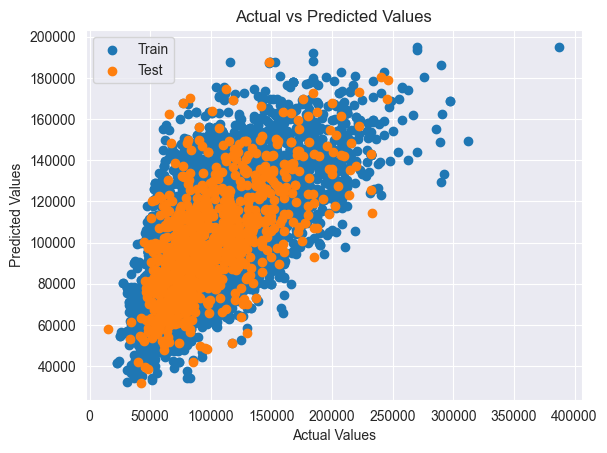

In [246]:
y_train_pred = linear.predict(x_train)
y_test_pred = linear.predict(x_test)

plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


# Step 6 - Conclusion
